# Unveiling the Secrets of Wine Quality

Bypassing traditional tasting methods, this project employs data analysis to predict the quality of wine based on its chemical features.

## 🍷 1. Introduction about the Data Set

### 📖 1.1 General Information:
- **Provided by**: [The UCI Machine Learning Repository](http://archive.ics.uci.edu/dataset/109/wine).
- **Donated by**: Paulo Cortez, Antonio Cerdeira, Fernando Almeida, Telmo Matos, and Jose Reis.
   - 📜 **Their paper**: [Modeling wine preferences by data mining from physicochemical properties](https://repositorium.sdum.uminho.pt/bitstream/1822/10029/1/wine5.pdf).
   - 🧐 **Main idea**: Using data mining to understand how various factors influence wine quality, offering insights into wine production and certification. 
   - ⚒️ **Approach**: Support Vector Machines (SVM), Neural Networks (NN), and Multiple Regression (MR) techniques.
   - 🧰 **Conclusion**: 
     - For assessing wine quality, the Support Vector Machine (SVM) method outperforms other techniques in accuracy, especially for white wines.
     - Alcohol level is a key factor in determining wine quality. Citric acid and residual sugar are more significant in white wines, whereas sulphates are highly important in both types.

### 🍇 1.2 Info about the Wine:
- **Types**: Both white and red wines from the Vinho Verde region in northwestern Portugal 🇵🇹.
- **Production**: Represents 15% of Portuguese production.

### 📊 1.3 Info about the Datasets:
- **Wines**: 1599 red and 4898 white samples.
- **Collection**:
   - ⏳ Timeframe: May 2004 to February 2007.
   - 🏷️ Type: Only protected designation of origin samples by CVRVV (Comissão de Viticultura da Região dos Vinhos Verdes), focused on enhancing the quality and marketing of vinho verde.
- **Quality Assessment**:
   - Rated by at least three sensory assessors (blind tastes), on a 0 (very bad) to 10 (excellent) scale. The final score is the median of these ratings.
- **Chemical Features Tested**:
   - 🧪 Data recorded by iLab, a computerized system managing wine sample testing.
   - Tests include density, alcohol, pH values, etc.
- **Limitation**:
  - Lack of Temporal Information:
    - We are unable to analyze variations in wine quality across different years, also making it impossible for us to identify the relationship between weather conditions and wine quality.
  - Lack of Brand and Public Preference Data: 
    - We are unable to establish a direct link between wine quality attributes and consumer preferences or sales performance. 

## 2. Research Questions and Motivations

### 2.1 Research Questions
Our reserach questions enhances and expands upon prior studies by:

- 🍇Which features contribute the most to predict good and poor quality of wine?
- 🍇What is the recipe for a good and poor wine? 


### 2.2 Motivations:
- 🍇 **Cultural Significance**: Residing in France, a nation celebrated for its wine tradition, we seek to deepen our understanding of wine. This analysisfosters a greater appreciation of this heritage.
- 🍾 **Enhancing Wine Production:** Providing actionable insights for quality improvement through advanced statistical and machine learning techniques.
- 📊 **Analytical Depth:** Leveraging data-driven methods to explore wine quality nuances. This exploration will enhance our analytical skills while shedding light on hidden characteristics within wines.

## 3. Data Analysis

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVR

from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression

from sklearn import metrics

from scipy.stats import zscore
from scipy.stats import pearsonr
import scipy.stats as stats

### 3.1 Extract Data: Reading from CSV Files

In [113]:
# These csv files are downloaded from the UCI website: 
# http://archive.ics.uci.edu/dataset/186/wine+quality.

df_white_wine = pd.read_csv("raw_data/winequality-white.csv", sep=";")
df_red_wine = pd.read_csv("raw_data/winequality-red.csv",sep=";")

In [114]:
df_white_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [115]:
df_red_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [116]:
wine_lists = [df_red_wine, df_white_wine]

df_white_wine.wine_type = "White Wine"
df_red_wine.wine_type = "Red Wine"

def get_wine_str(wine_type_df):
    return getattr(wine_type_df, 'wine_type', "Unknown Wine")

### 3.2 Transformation

Here we want to create QQ Plots to understand if the features follow normal distribution or not.

In [117]:
def check_numeric_columns(wine_type_df):
    """
    Select and return the names of numeric columns from the given DataFrame.

    Parameters:
    - wine_type_df: a DataFrame containing data related to wine types.

    Returns:
    - list of column names corresponding to numeric columns.
    """
    numeric_columns = wine_type_df.select_dtypes(include=[np.number])
    column_names = numeric_columns.columns

    return column_names


In [118]:
def create_qq_plot(wine_type_df, folder):
    """
    Create Q-Q plot for each of the feautres of dataset, display them on one canva
    
    Parameters:
    - wine_type_df: The DataFrame containing data related to wine types.
    """
    wine_type = get_wine_str(wine_type_df)

    # Select numerical columns
    numeric_columns = check_numeric_columns(wine_type_df)

    fig, axs = plt.subplots(3, 4, figsize=(20, 15))  
    axs = axs.flatten()

    # Q-Q plot 
    for i, column in enumerate(numeric_columns):  
        if i <= 11:
            data = wine_type_df[column]
            stats.probplot(data, dist="norm", plot=axs[i])
            axs[i].set_title(column, fontsize = 30)
            axs[i].set_xlabel('')
            axs[i].set_ylabel('')

    title = f"QQ Plots for {wine_type}"
    fig.suptitle(title, fontsize=40, weight='bold')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig(f'figures/{folder}/{title}.png', bbox_inches = 'tight')
    plt.show()

In [119]:
def create_plots(plot_function, saving_folder, wine_list=wine_lists):
    """
    Create plots using a specified plot function for each item in the list od datasets.

    Parameters:
    - plot_function (callable): The function used to generate plots.
    - saving_folder (str): The folder name to save the plots.
    - wine_list (list): The list of items for which plots will be created.
    """
    # Create a folder for graphs if it doesn't exist
    if saving_folder is not None and not os.path.isdir(f'figures/{saving_folder}'):
        os.makedirs(f'figures/{saving_folder}')
    
    # Generate plots for each item in the list
    for item in wine_list:
        plot_function(item, saving_folder)


def use_function(function, wine_list=wine_lists):
    """
    Apply a specified function to each df in the list.

    Parameters:
    - function (callable): The function to be applied.
    - wine_list (list): The list of df for which the function will be applied.
    """
    for item in wine_list:
        function(item)


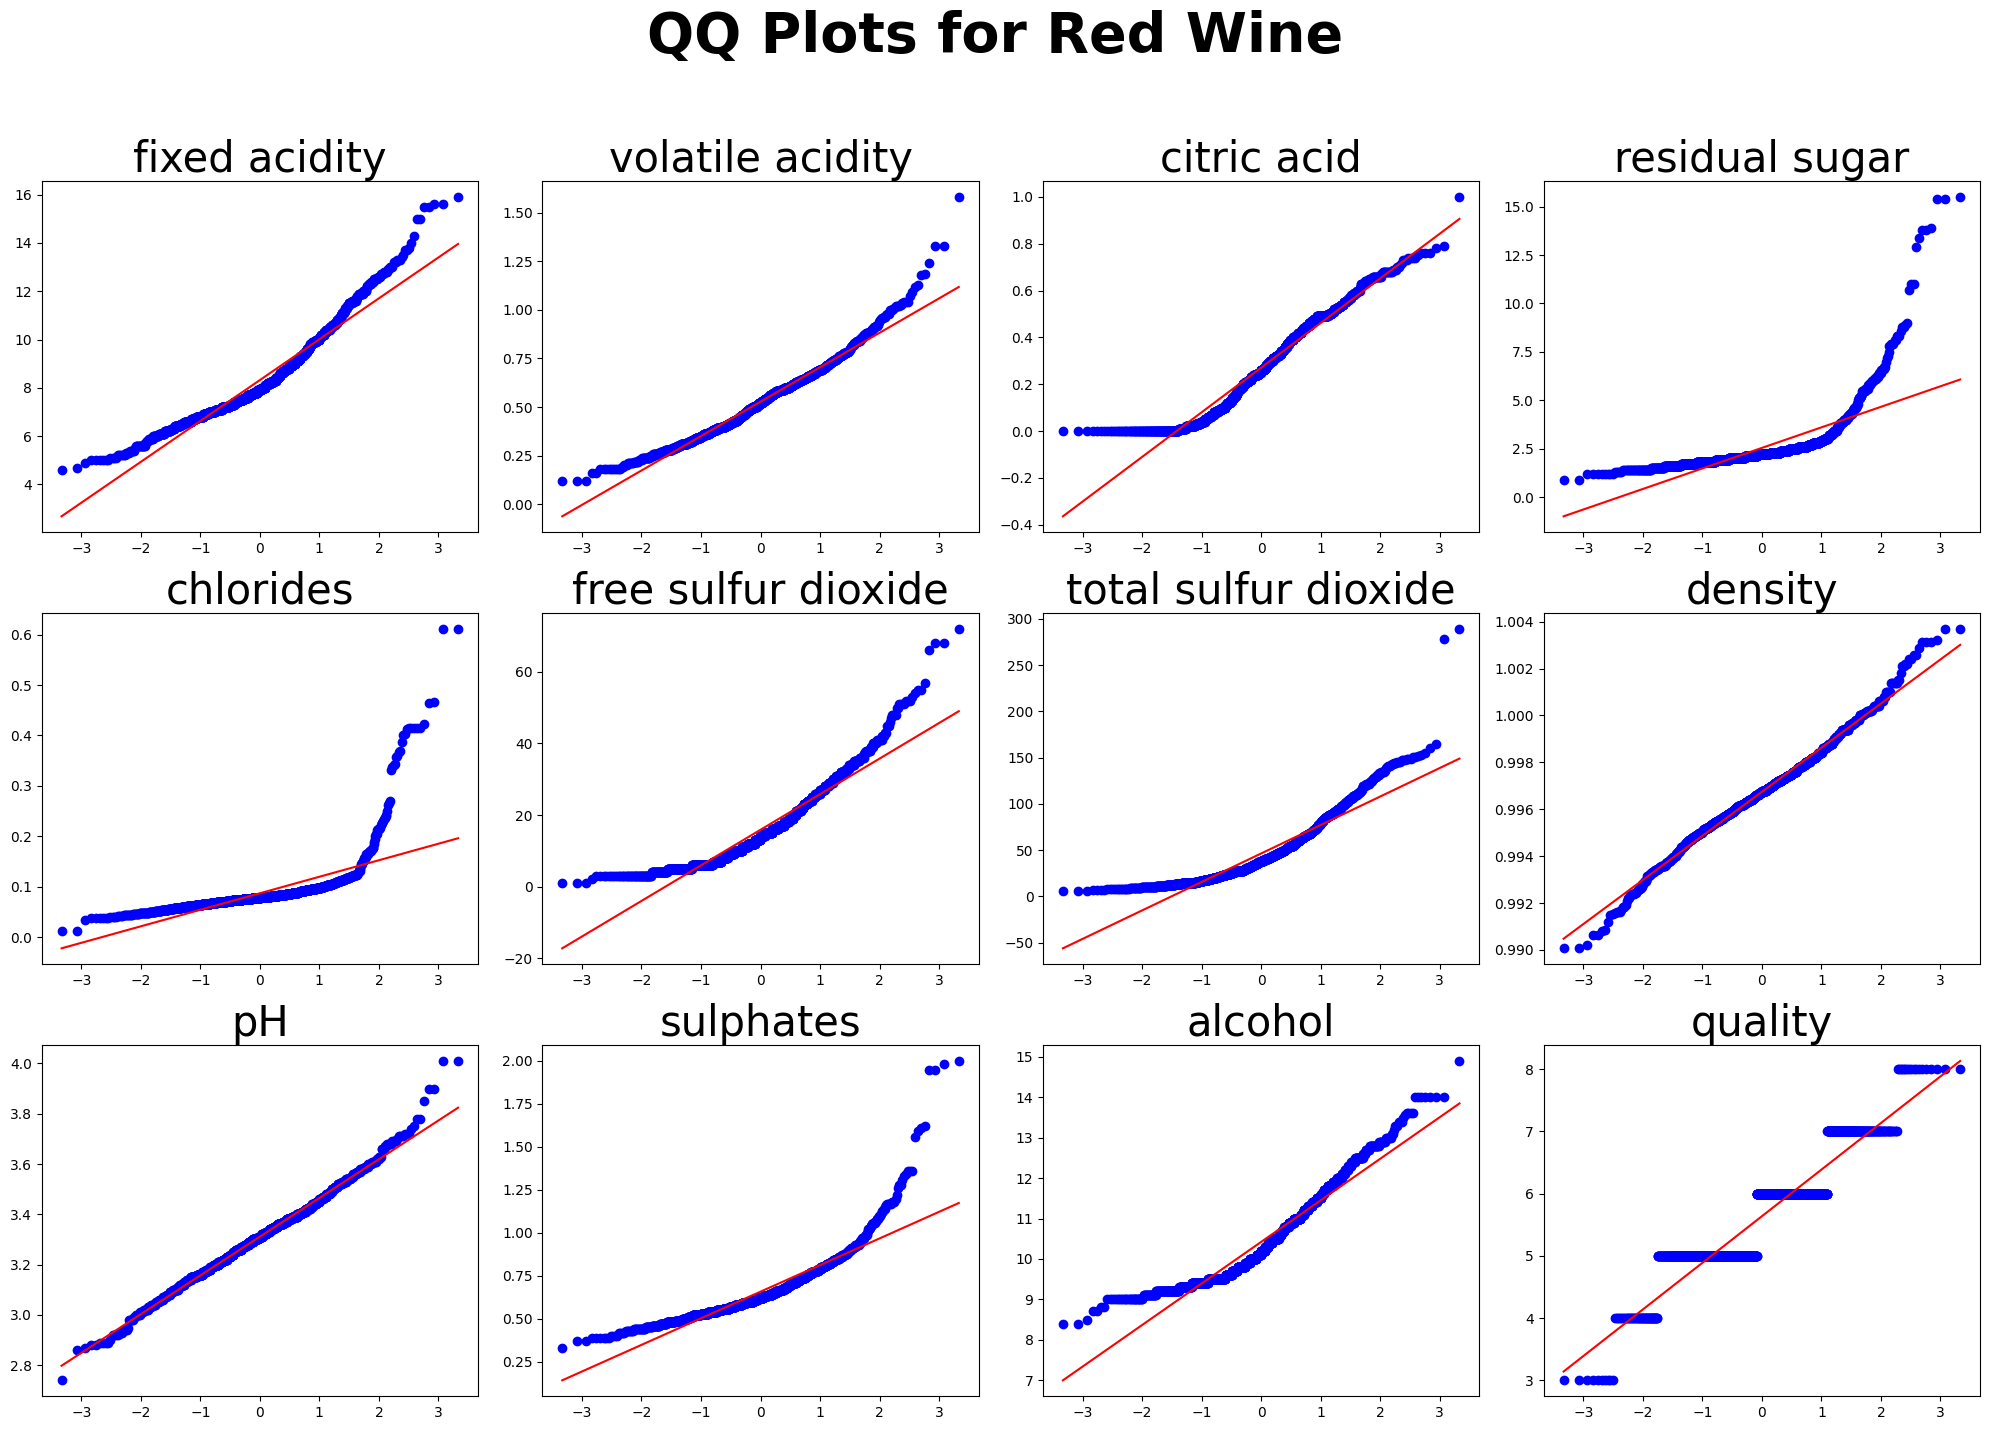

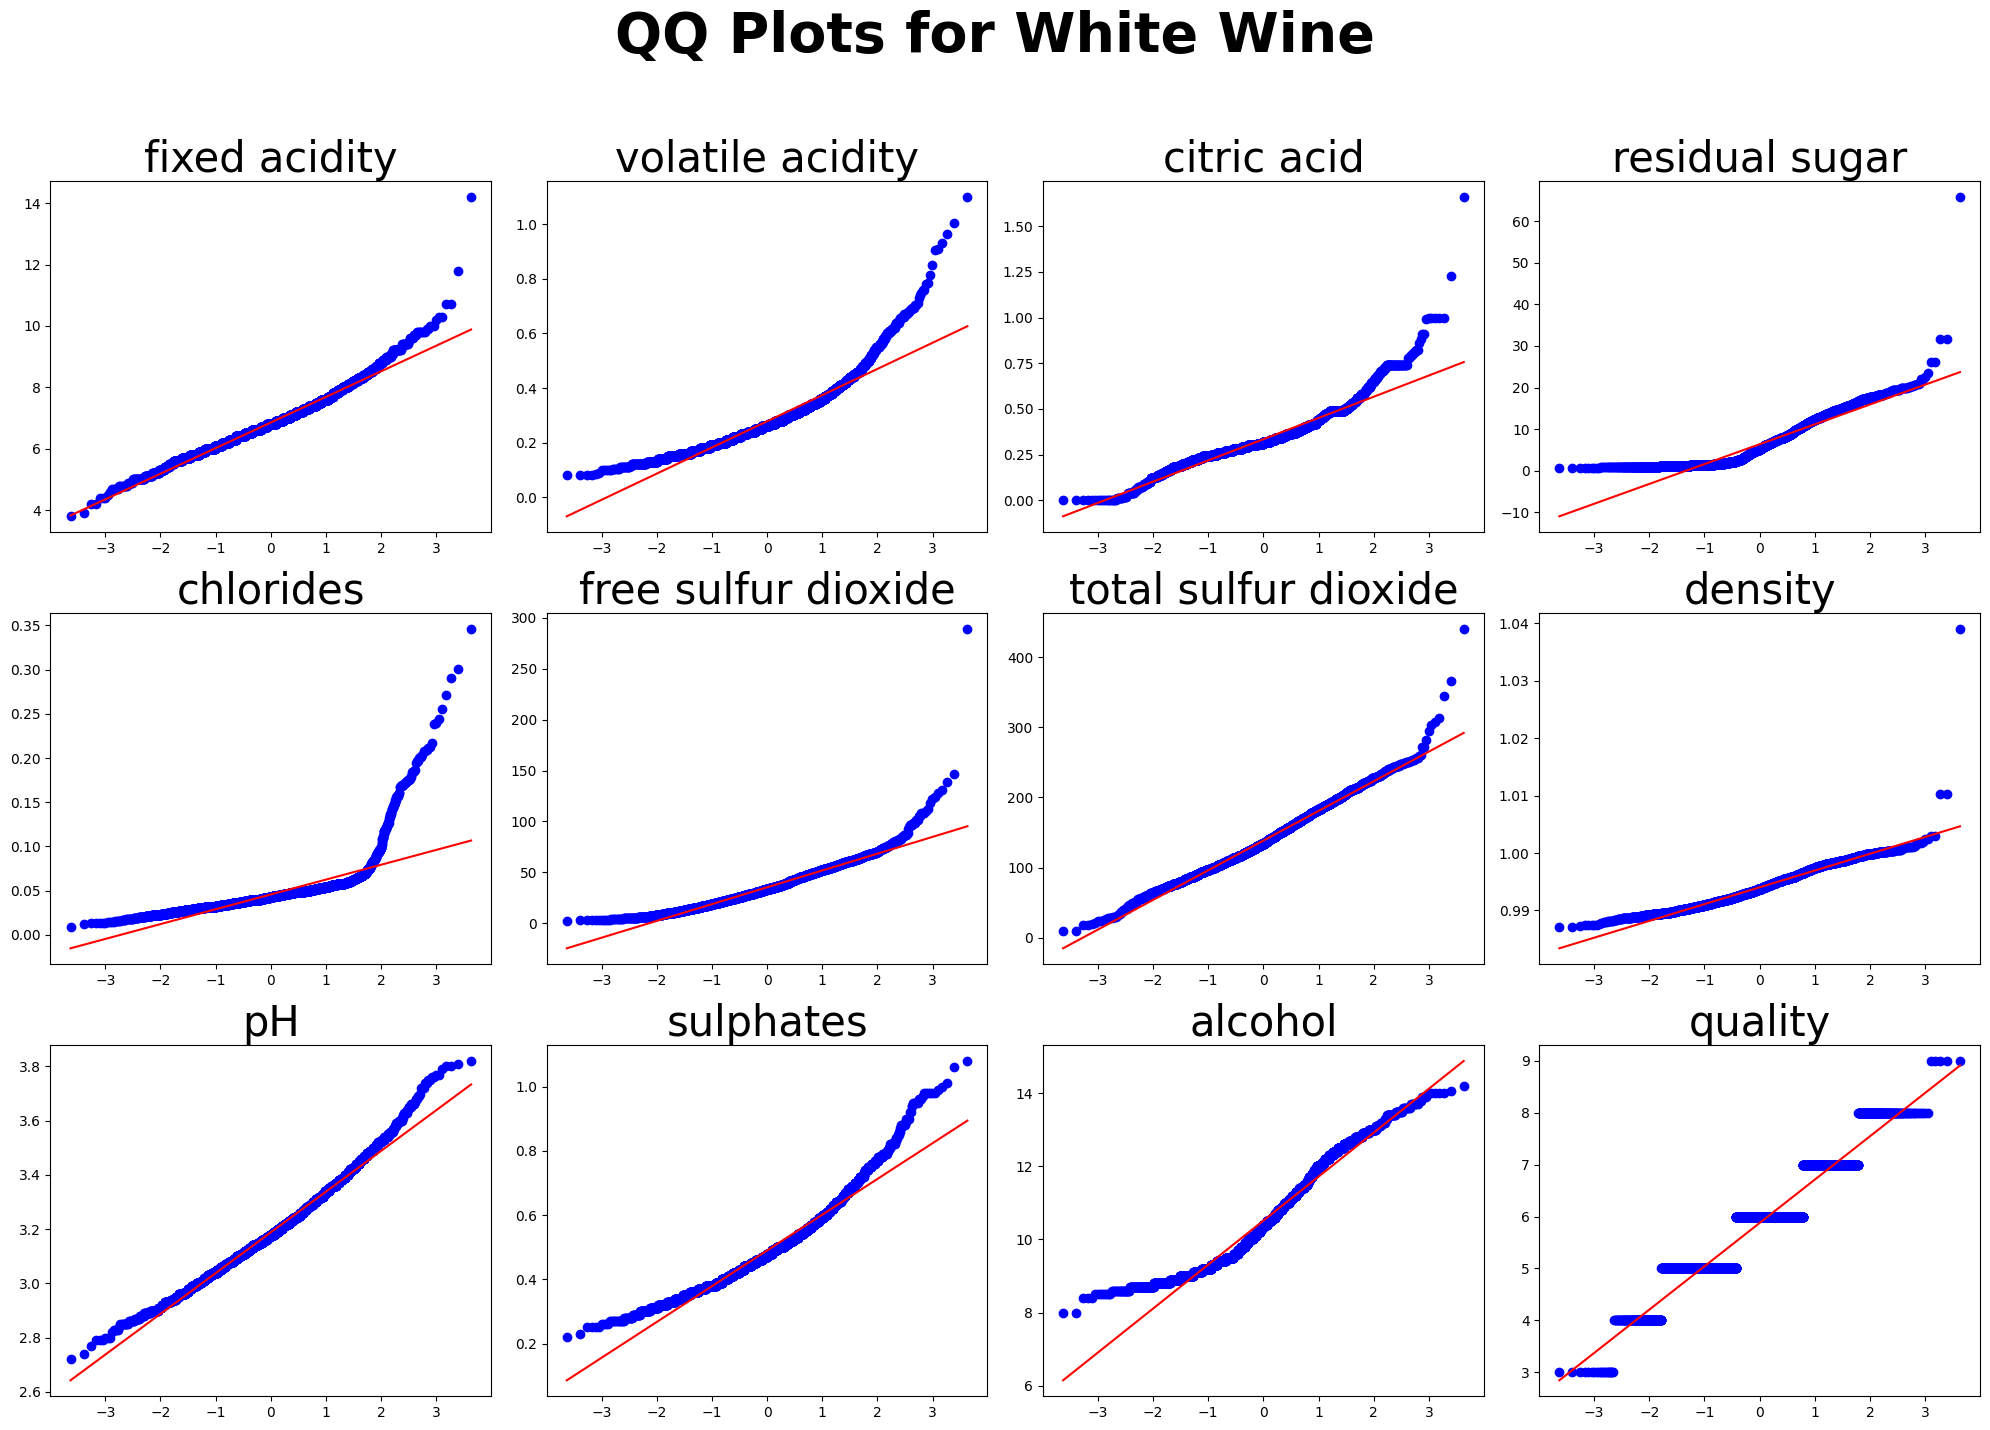

In [120]:
create_plots(create_qq_plot,'1_QQ_plots', wine_lists)

### Observations from QQ Plots of Red and White Wine Datasets:

1. **Right Skewness**:
   - **Red Wine**: `Residual Sugar` and `Alcohol` show deviations in the lower quantiles.
   - **White Wine**: Similar to Red Wine, `Residual Sugar` and `Alcohol` show deviations in the lower quantiles.

2. **Left Skewness**:
   - **Red Wine**: `Free Sulfur Dioxide`, `Chlorides`, and `Sulphates` show deviations in the upper quantiles.
   - **White Wine**: `Volatile Acidity`, `Chlorides`, and `Sulphates` show deviations in the upper quantiles.

3. **Implications for Data Processing**:
   - The observed skewness in both datasets suggests the need for normalization transformations. We will continue to calculate skewness coefficient. 
   - Techniques like logarithmic or Box-Cox transformations may be beneficial to address these deviations and improve the homogeneity of the data.

In [121]:
def calculate_skewness_coefficient(wine_type_df):

    print(f"\nThe skewness coefficient of {get_wine_str(wine_type_df)}: \n")

    numerical_columns = wine_type_df.select_dtypes(include=['number']).columns

    for column in numerical_columns:  
        skewness = round(wine_type_df[column].skew(),2)
        print(f"{column}: {skewness}")

In [122]:
# use_function(calculate_skewness_coefficient, wine_lists)

### Observations from the skewness coefficient

1. **White Wine**:
   - Chlorides (5.02): Highly skewness. 
   - Volatile Acidity (1.58), Citric Acid (1.28), Residual Sugar (1.08), Free Sulfur Dioxide (1.41): : Moderate skewness.
2. **Red Wine**:
   - Residual Sugar (4.54) and Chlorides (5.68): Highly skewness
   - Free Sulfur Dioxide (1.25), Total Sulfur Dioxide (1.52), Sulphates (2.43): Moderate skewness.

We are going to do log transformation for features of highly skewness and moderate skewness.

In [123]:
white_wine_log_columns = [
    'chlorides',
    'volatile acidity',
    'citric acid',
    'residual sugar',
    'free sulfur dioxide'
]

red_wine_log_columns = [
    'residual sugar',
    'chlorides',
    'free sulfur dioxide',
    'total sulfur dioxide',
    'sulphates'
]

log_red_wine_df = df_red_wine.copy()
log_white_wine_df = df_white_wine.copy()

log_red_wine_df[red_wine_log_columns] = np.log(log_red_wine_df[red_wine_log_columns] + 0.001)
log_white_wine_df[white_wine_log_columns] = np.log(log_white_wine_df[white_wine_log_columns]+ 0.001)

log_red_wine_df.wine_type = "Red Wine(Log)"
log_white_wine_df.wine_type = "White Wine(Log)"

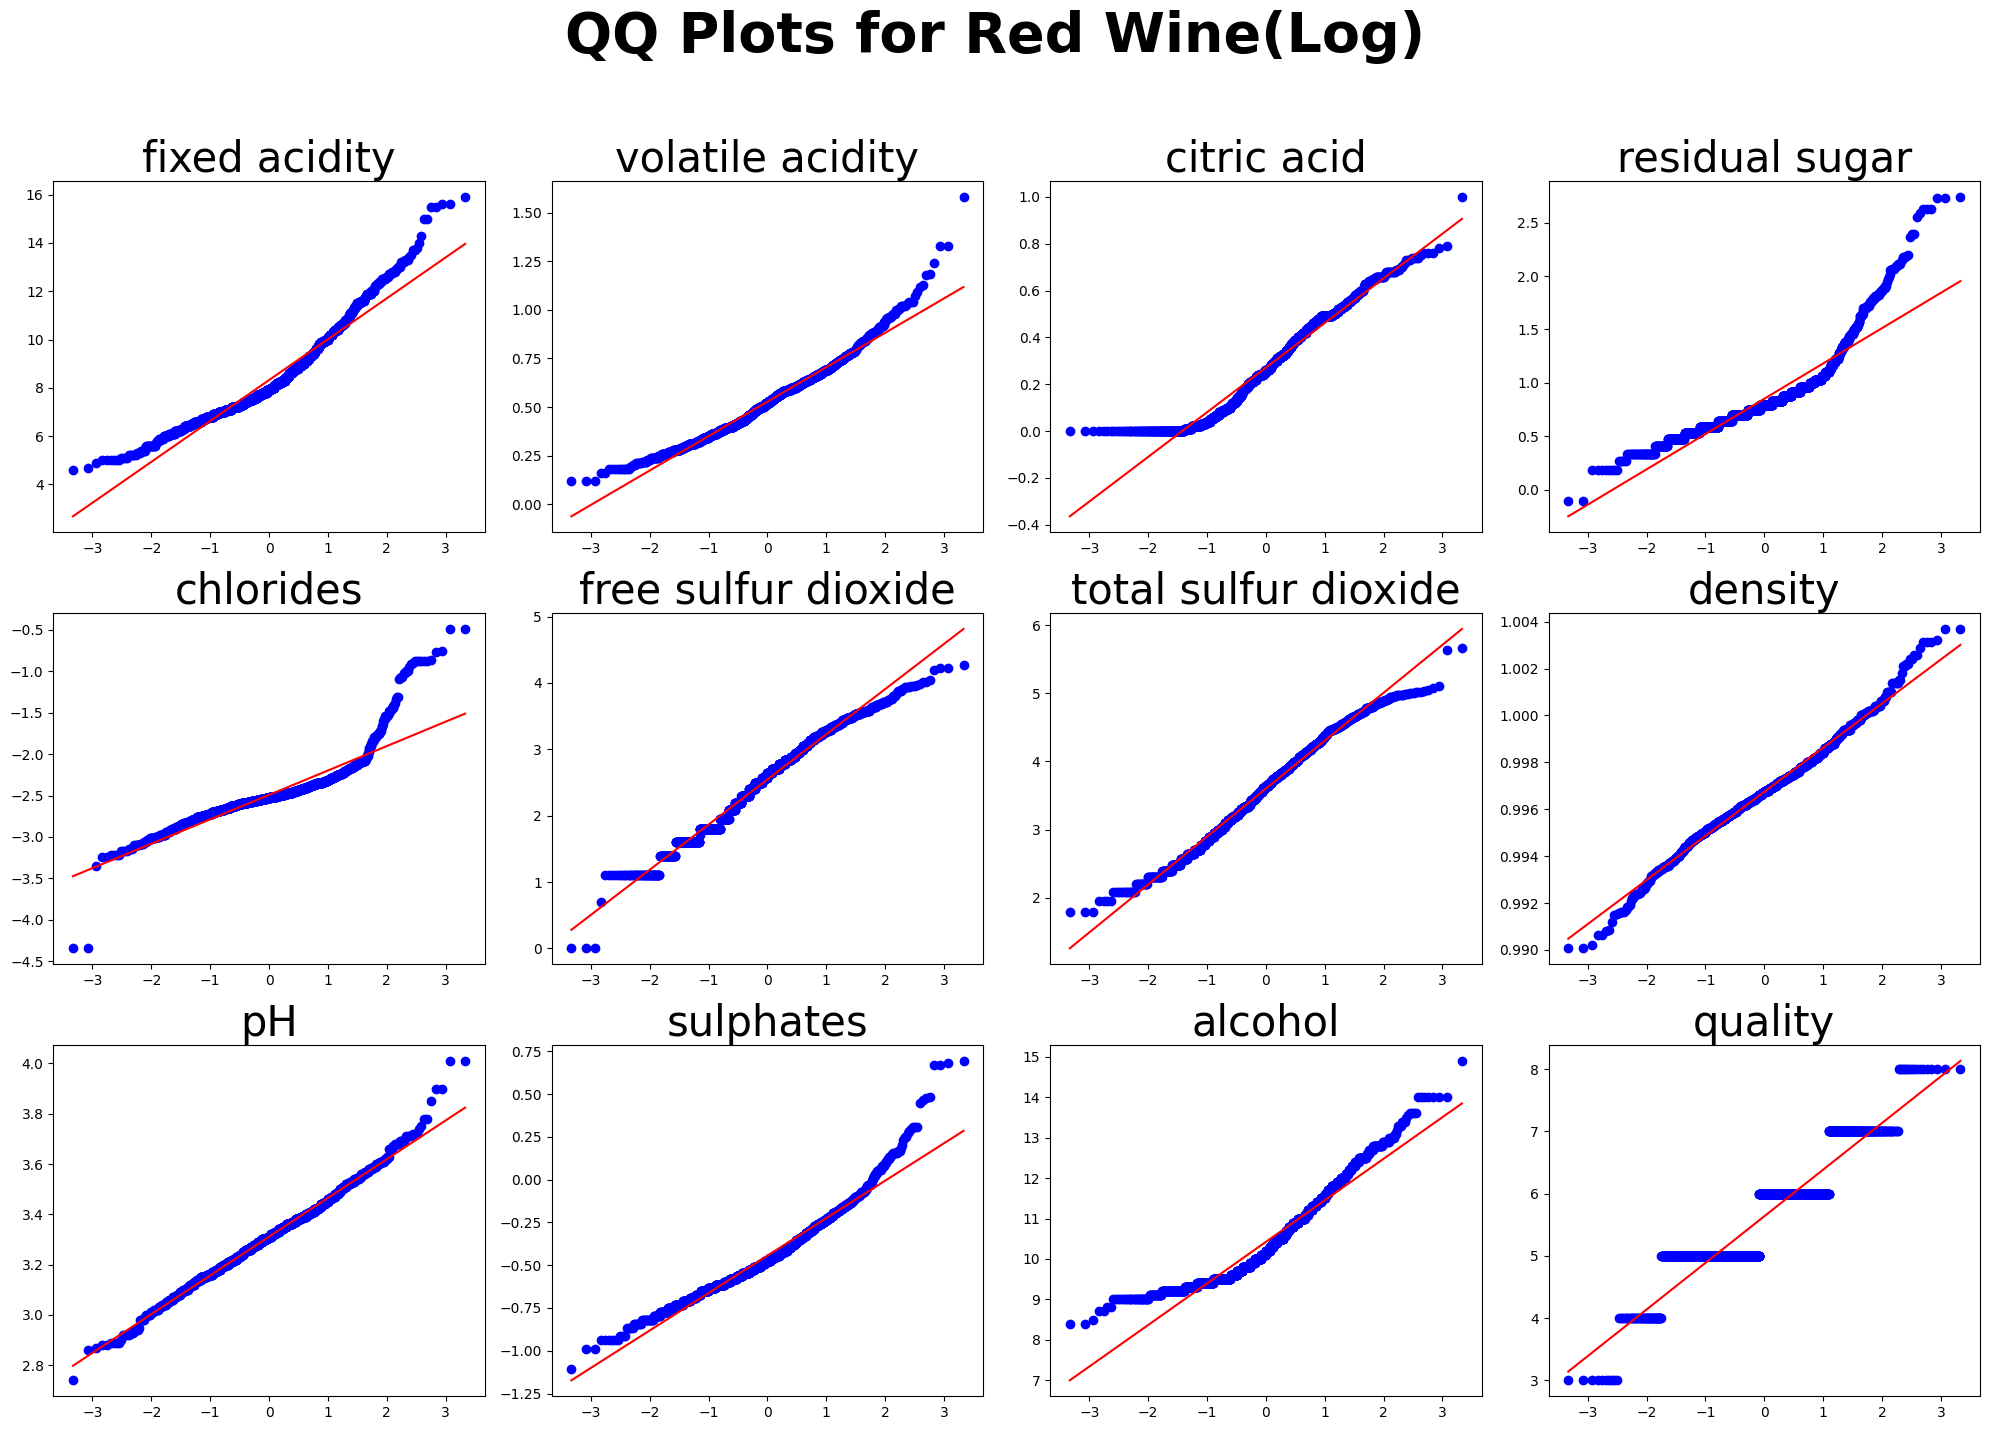

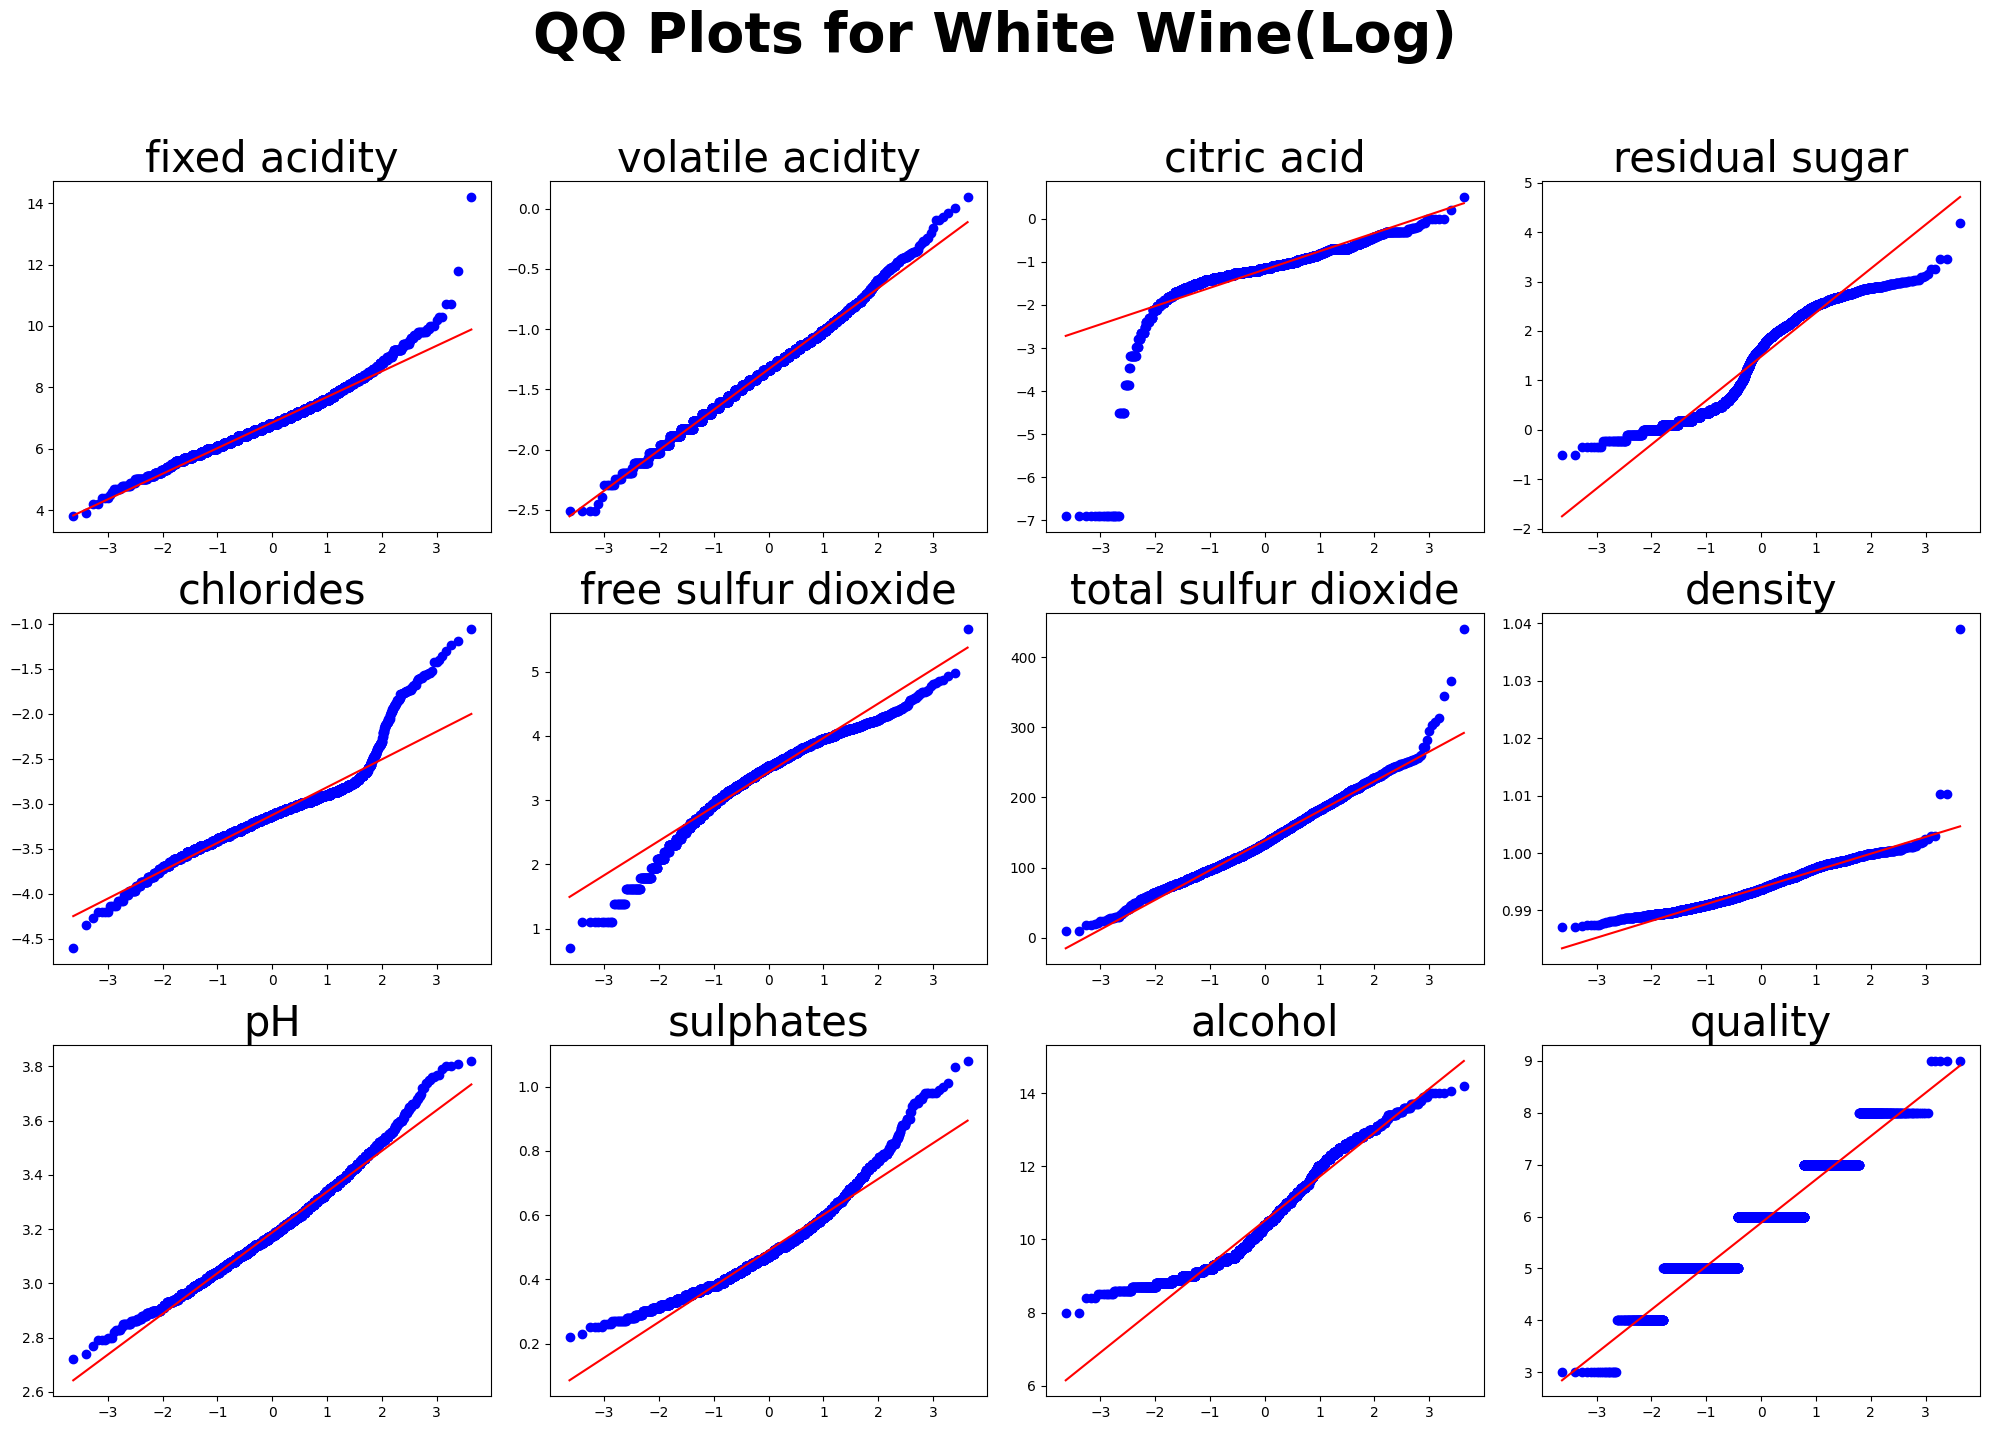

In [124]:
log_dfs = [log_red_wine_df, log_white_wine_df]

create_plots(create_qq_plot, "2_QQ_plots_log", log_dfs)
#use_function(calculate_skewness_coefficient, log_dfs)

### Observations based on the first log transformation:
1. **Red Wine (Original vs Log-Transformed):**
   - Original: `Residual sugar` 4.54, `Chlorides` 5.68.
   - Log-Transformed: `Residual sugar` 1.81, `Chlorides` 1.79.
   - `Free sulfur dioxide` changed from positive (1.25) to slightly negative skewness (-0.23).

2. **White Wine (Original vs Log-Transformed):**
   - Original: `Volatile acidity` 1.58, `Citric acid` 1.28.
   - Log-Transformed: `Volatile acidity` 0.14, `Citric acid` -5.56 (over-correction).
   - `Residual sugar` reduced from 1.08 to -0.16, `Chlorides` from 5.02 to 1.19.

3. **Minimal Impact on Some Variables:**
   - `Alcohol` and `quality` in both Red and White wines showed minimal changes (around 0.86 and 0.22 respectively).

4. **Avoid Log Transformation For:**
   - Red Wine: `Free sulfur dioxide` and `Total sulfur dioxide`.
   - White Wine: `Citric acid` and `Residual sugar` .

In [125]:
white_wine_update_log_columns = [
    'chlorides',
    'volatile acidity'
]
red_wine_update_log_columns = [
    'residual sugar',
    'chlorides'
]

log_red_update_wine_df = df_red_wine.copy()
log_white_update_wine_df = df_white_wine.copy()

log_red_update_wine_df[red_wine_update_log_columns] = np.log(log_red_update_wine_df[red_wine_update_log_columns] + 0.001)
log_white_update_wine_df[white_wine_update_log_columns] = np.log(log_white_update_wine_df[white_wine_update_log_columns]+ 0.001)

log_red_update_wine_df.wine_type = "Red Wine(Second Log)"
log_white_update_wine_df.wine_type = "White Wine(Second Log)"

log_update_dfs = [log_white_update_wine_df, log_red_update_wine_df]


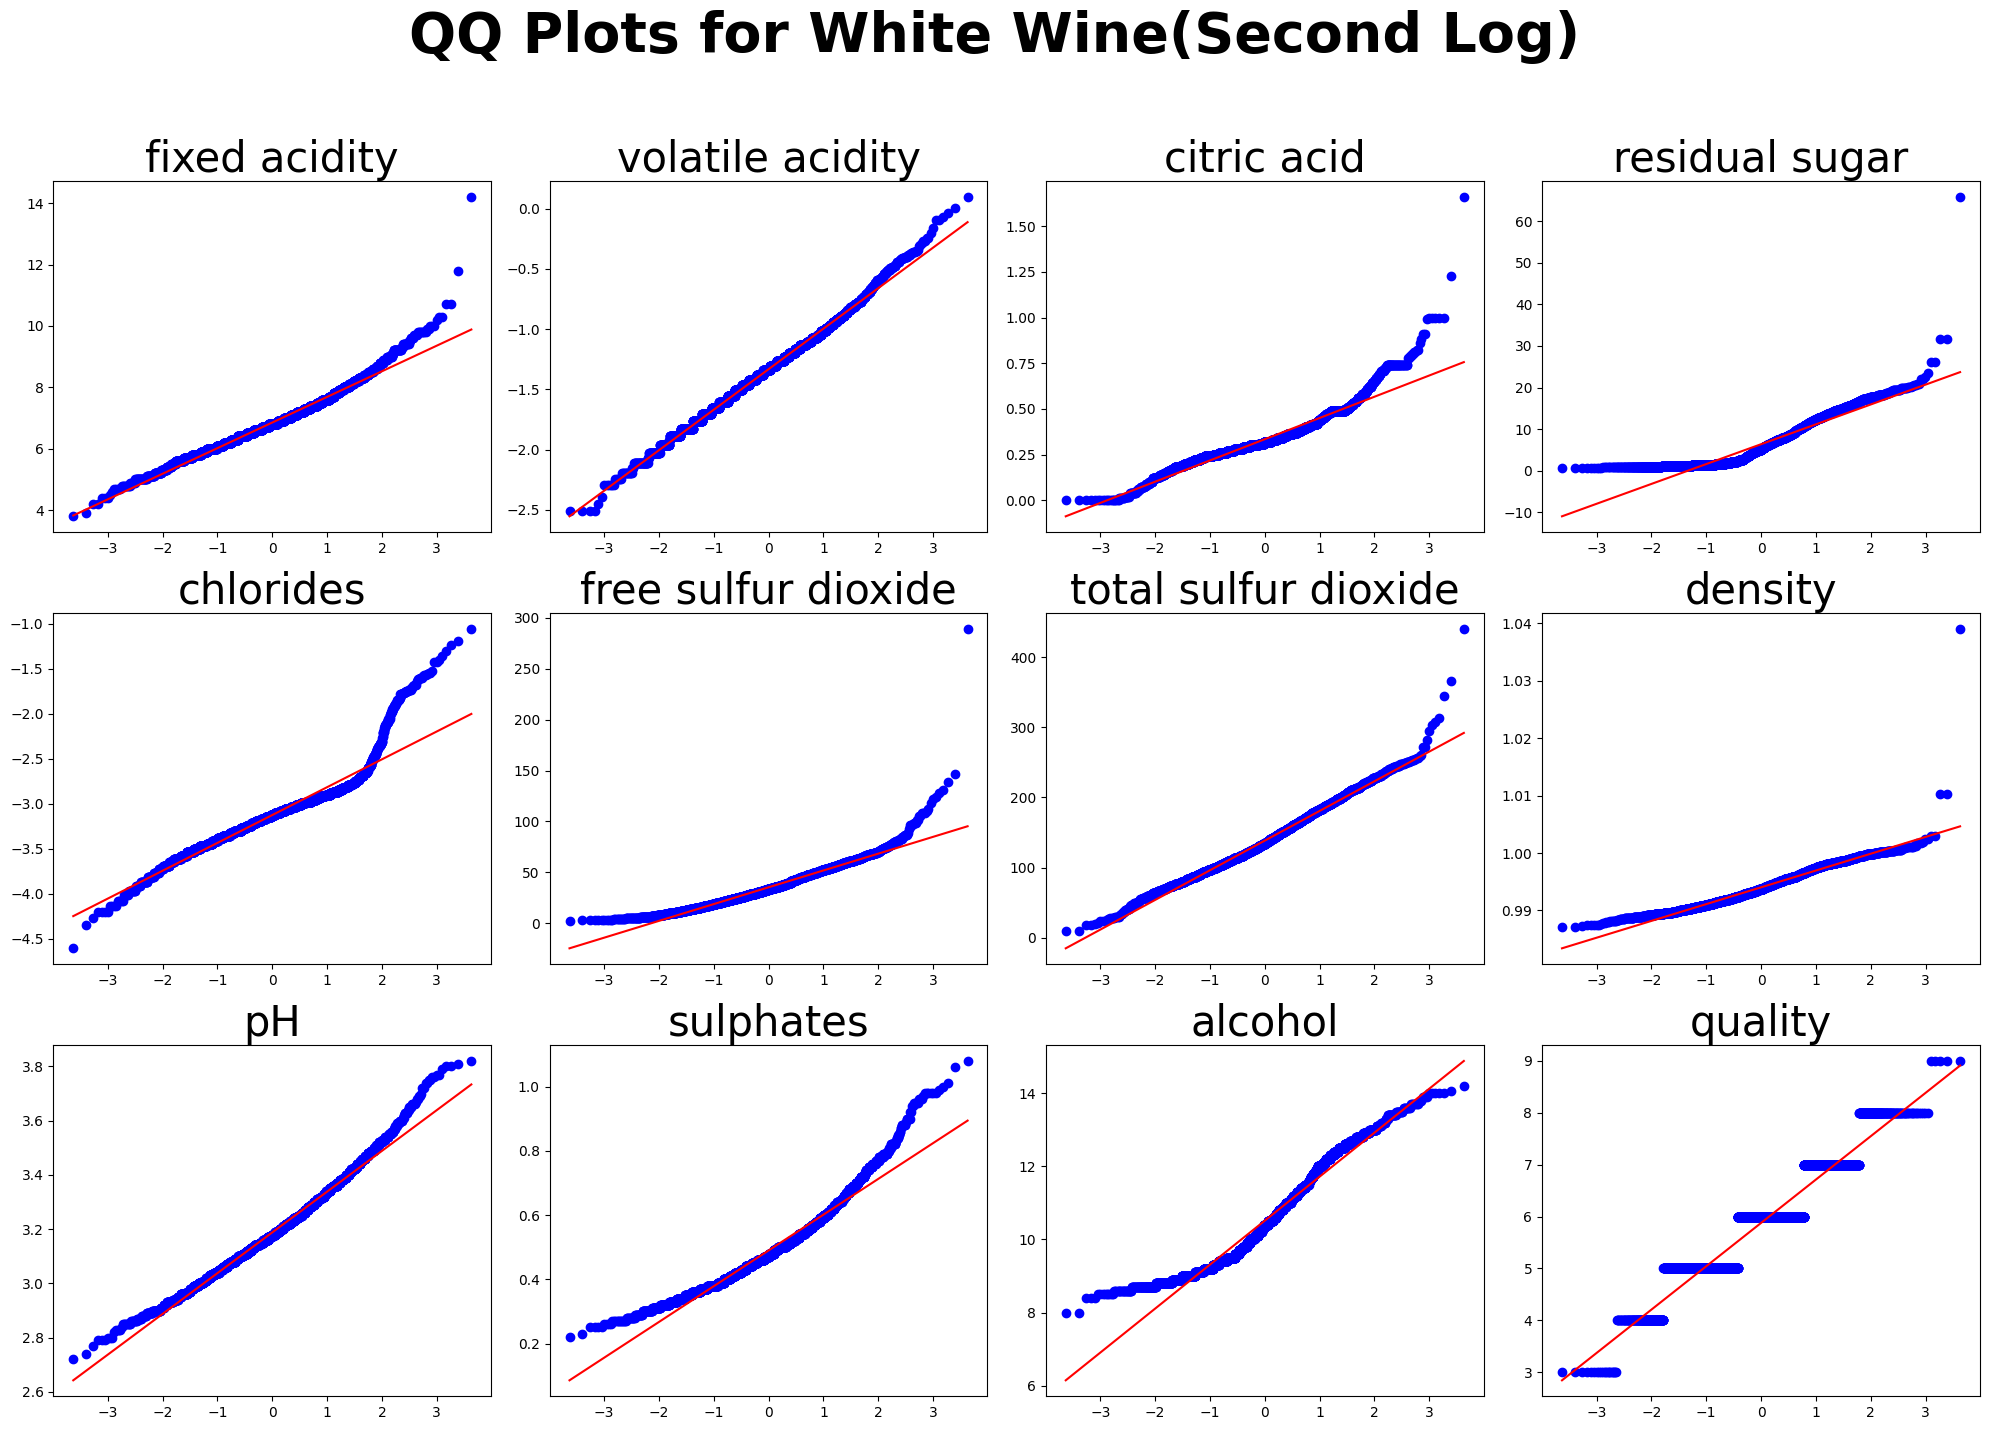

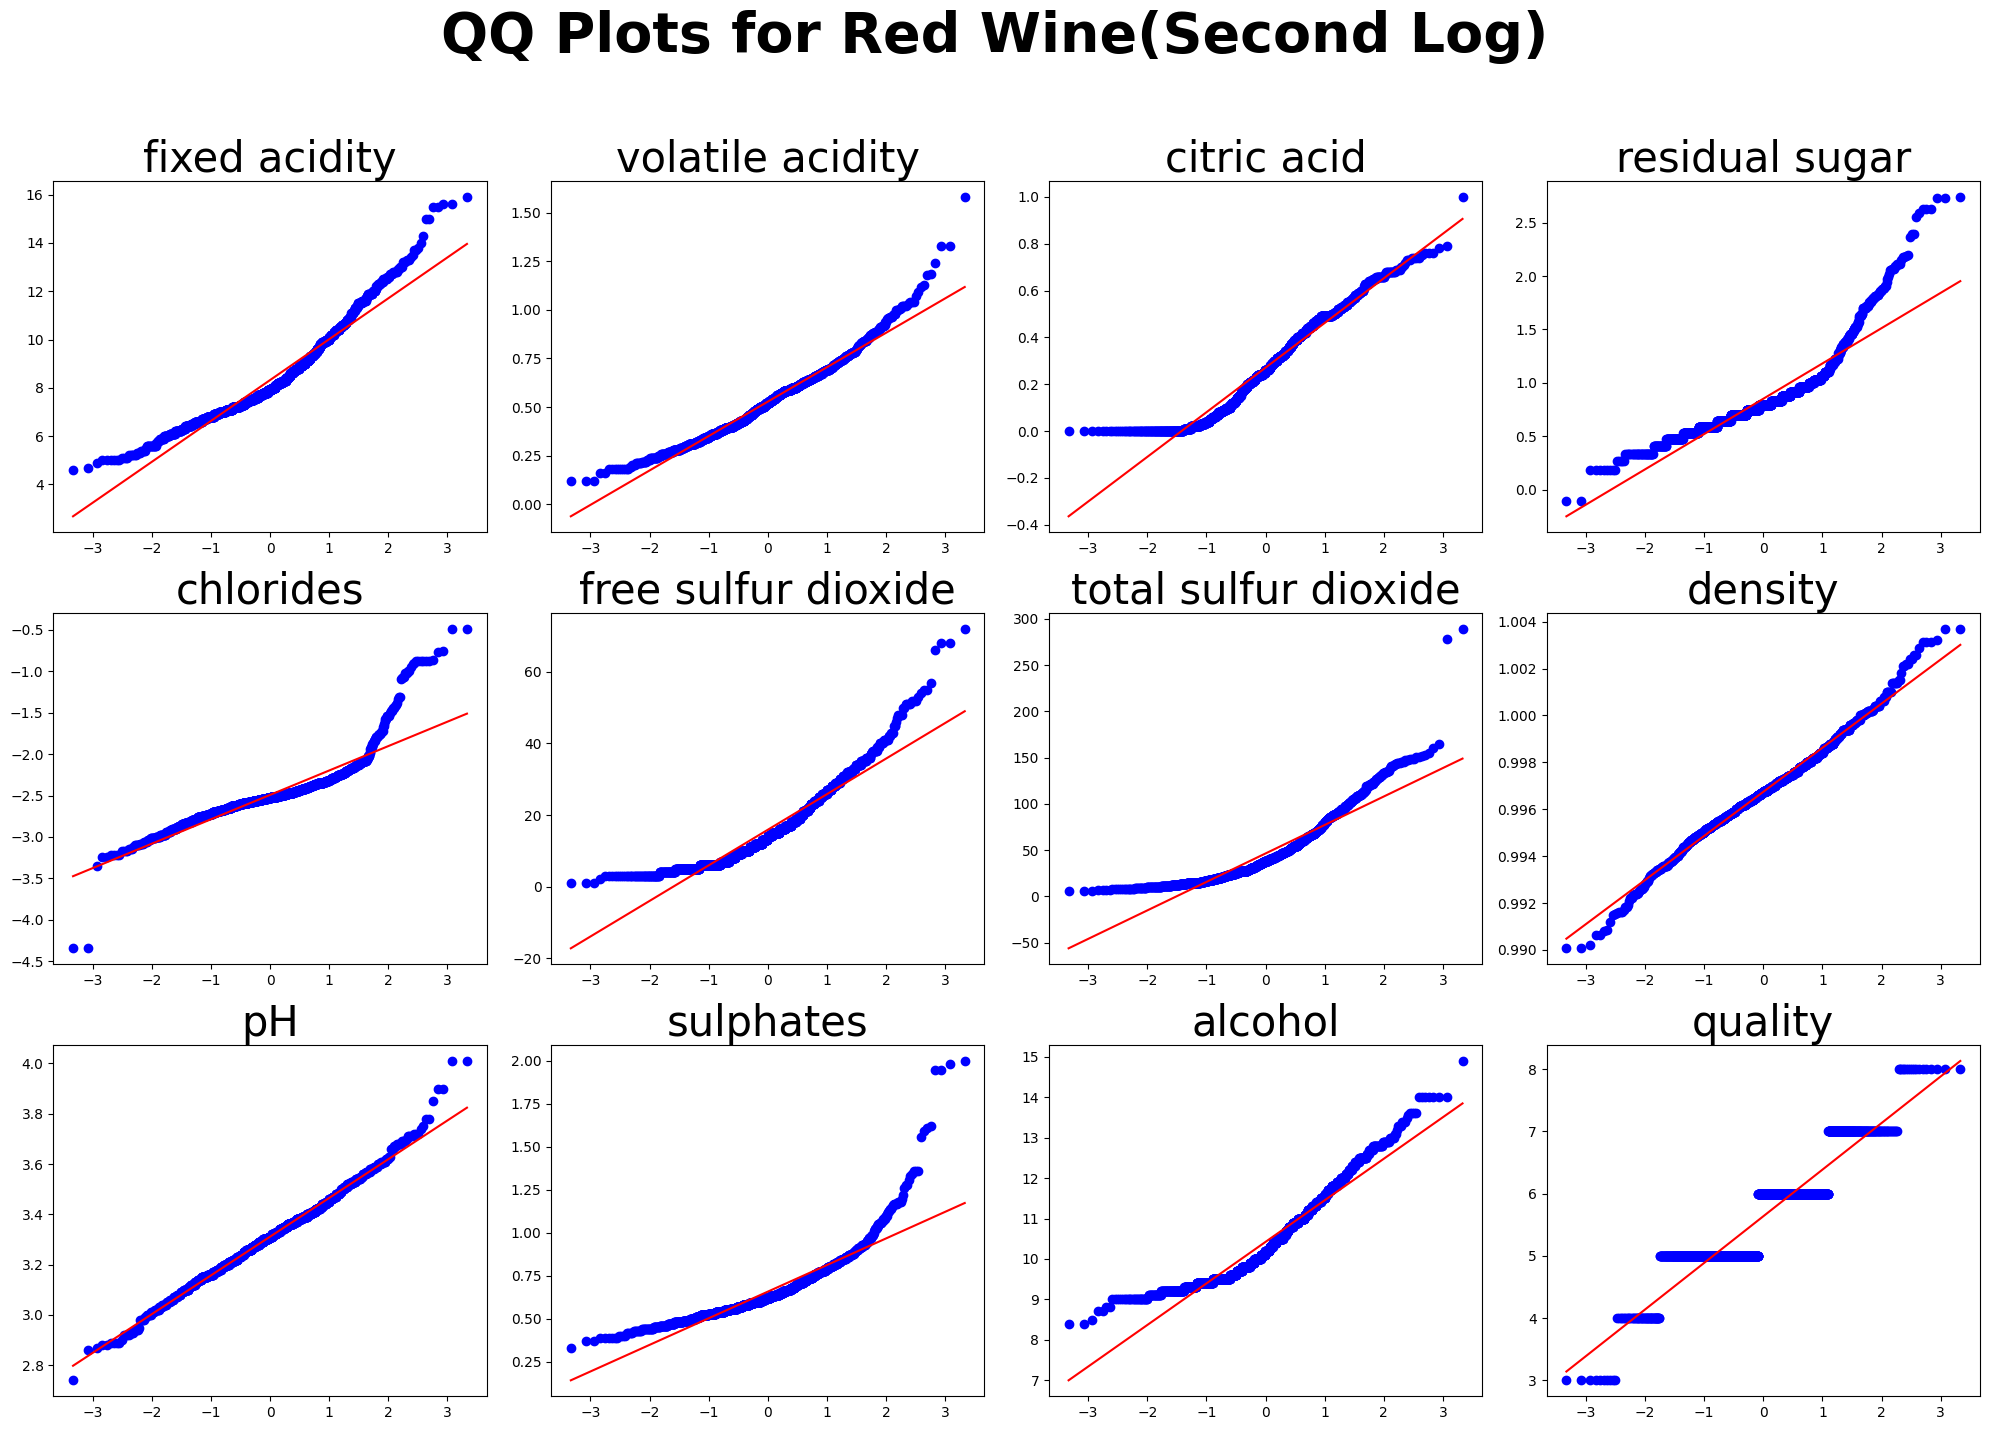

In [126]:
create_plots(create_qq_plot, '3_QQ_plots_log_corrected', log_update_dfs)
#use_function(calculate_skewness_coefficient, log_update_dfs)

### Observations from the model with log:

1. **White Wine:**
   - Log transformation significantly reduced skewness in `volatile acidity` (from 1.58 to 0.14) and `chlorides` (from 5.02 to 1.19).
2. **Red Wine:**
   - Effective reduction in skewness for `residual sugar` (from 4.54 to 1.81) and `chlorides` (from 5.68 to 1.79).
3. **Conclusion:**
   - The second log transformation was successful in reducing high skewness for key variables in both Red and White Wine datasets.


# 3.3 Clean Data

### 3.3.1 Check for missing values

We are going to check if there are empty values.

In [127]:
def check_na(wine_type_df):
    print(f'{get_wine_str(wine_type_df)}')
    print(wine_type_df.info())
    print(wine_type_df.isnull().sum())

use_function(check_na, log_update_dfs)

White Wine(Second Log)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar      

### **Observations from Checking Missing Values:**
1. There are no missing data in either dataset.
2. All feature columns are of the float type, and the target column is an integer.

#### 3.3.2 Outlier Analysis

We will create box plots to understand the outliers.

In [128]:
def create_box_plot(wine_type_df, folder):
    feature_columns = wine_type_df.drop(columns=['quality']).columns.tolist()
    fig, axs = plt.subplots(3, 4, figsize=(25, 18))  

    # Flatten the array of axes to make it easier to iterate over
    axs = axs.flatten()

    for i, column in enumerate(feature_columns): 
        sns.boxplot(x='quality', y=column, data=wine_type_df, ax=axs[i], legend=False, color = "grey")
        axs[i].set_title(column, fontsize=30, weight='bold')  
        axs[i].set_xlabel('')
        axs[i].set_ylabel('')

        plt.xticks(rotation=45, fontsize=20)
        plt.yticks(fontsize=20)

    title = f'Box Plots for {get_wine_str(wine_type_df)}'
    fig.suptitle(title, fontsize=40, weight='bold')
    
    plt.savefig(f'figures/{folder}/{title}.png', bbox_inches = 'tight')
    plt.show()

In [129]:
#create_plots(create_box_plot, '1 _Boxplots_wine_type', log_update_dfs)

### **Observations from Box Plots**
1. It's hard to decide should we delete outliers or not based on these plots. 
2. We are going to develop separate QQ plots for wines classified into different quality categories: bad(3-4), middle(5-6-7), and good(8-9) to better understand our outliers.

To understand distribution asymmetries, we use skewness coefficient to identify which variables deviate from normality.

To pinpoint extreme outliers, we use a a threshold of Z-score > 6 to focuse on the most anomalous data points in the wine quality dataset.

In [130]:
def calculate_z_score(wine_type_df):
    z_scores_df = wine_type_df.copy()

    print(f"\nZ Score of {get_wine_str(wine_type_df)}:\n")

    for col in wine_type_df.columns:
        if col != 'quality' and col != 'quality_category':
            z_scores_df[col + ' Z-score'] = zscore(wine_type_df[col])
            
            outliers = abs(z_scores_df[col + ' Z-score']) > 6
            outlier_count = outliers.sum()
            print(f"Outliers in {col}: {outlier_count}")

            if outlier_count > 0:
                print(f"Outlier data for {col}:\n{wine_type_df[outliers]}")
                print("\n") 

In [131]:
#use_function(calculate_z_score, log_update_dfs)

### **Observations from Skewness Coefficients and Z-Score Analysis**

### White Wine:
- **Poor Quality White Wine:**
  - Notable skewness in `chlorides` (1.51) and `free sulfur dioxide` (1.85).
  - Outliers are mainly in `free sulfur dioxide` and `total sulfur dioxide`.
- **Good Quality White Wine:**
  - Higher skewness in `citric acid` (1.94) and `density` (1.53).
  - Outliers are present in several attributes, notably in `citric acid` (7 outliers) and `density` (1 outlier).

### Red Wine:
- **Poor Quality Red Wine:**
  - Considerable skewness in `chlorides` (2.51) and `sulphates` (3.08).
  - Outliers are observed in `sulphates` (2) and `alcohol` (1).
- **Good Quality Red Wine:**
  - Skewness is pronounced in `total sulfur dioxide` (2.64) and `sulphates` (2.18).
  - Outliers are mainly in `total sulfur dioxide` (2) and `sulphates` (2).

In [132]:
def delete_outliers(wine_type_df):
    without_outliers_df = wine_type_df.copy()

    for col in without_outliers_df.columns:
        if col != 'quality' and col != 'quality_category':
            without_outliers_df[col + '_Z_score'] = zscore(without_outliers_df[col])

    for col in without_outliers_df.columns:
        if '_Z_score' in col:
            without_outliers_df = without_outliers_df[np.abs(without_outliers_df[col]) <= 6]

    return without_outliers_df.drop(columns=[c for c in without_outliers_df if '_Z_score' in c])

In [133]:
df_white_without_outliers = log_white_update_wine_df.copy()
df_red_without_outliers = log_red_update_wine_df.copy()

df_white_without_outliers = delete_outliers(log_white_update_wine_df)
df_red_without_outliers = delete_outliers(log_red_update_wine_df)

df_white_without_outliers.wine_type = 'White Wine (Without Outliers)'
df_red_without_outliers.wine_type = 'Red Wine (Without Outliers)'

wine_without_outliers_dfs = [df_white_without_outliers, df_red_without_outliers]


In [134]:
bin_edges = [2, 5, 10]
bin_labels = ['poor', 'good']

red_wine_quality_df = df_red_without_outliers.copy()
white_wine_quality_df = df_white_without_outliers.copy()

red_wine_quality_df['quality_category'] = pd.cut(red_wine_quality_df['quality'], bins=bin_edges, labels=bin_labels)
white_wine_quality_df['quality_category'] = pd.cut(white_wine_quality_df['quality'], bins=bin_edges, labels=bin_labels)

df_red_poor_without_outliers = red_wine_quality_df[red_wine_quality_df['quality_category'] == 'poor']
df_red_good_without_outliers = red_wine_quality_df[red_wine_quality_df['quality_category'] == 'good']

df_white_poor_without_outliers = white_wine_quality_df[white_wine_quality_df['quality_category'] == 'poor']
df_white_good_without_outliers = white_wine_quality_df[white_wine_quality_df['quality_category'] == 'good']


df_white_poor_without_outliers.wine_type = 'White Wine Poor (Without Outliers)'
df_white_good_without_outliers.wine_type = 'White Wine Good (Without Outliers)'
df_red_poor_without_outliers.wine_type = 'Red Wine Poor (Without Outliers)'
df_red_good_without_outliers.wine_type = 'Red Wine Good (Without Outliers)'

wine_quality_without_outliers_dfs = [
    df_white_poor_without_outliers,
    df_white_good_without_outliers,
    df_red_poor_without_outliers,
    df_red_good_without_outliers
]


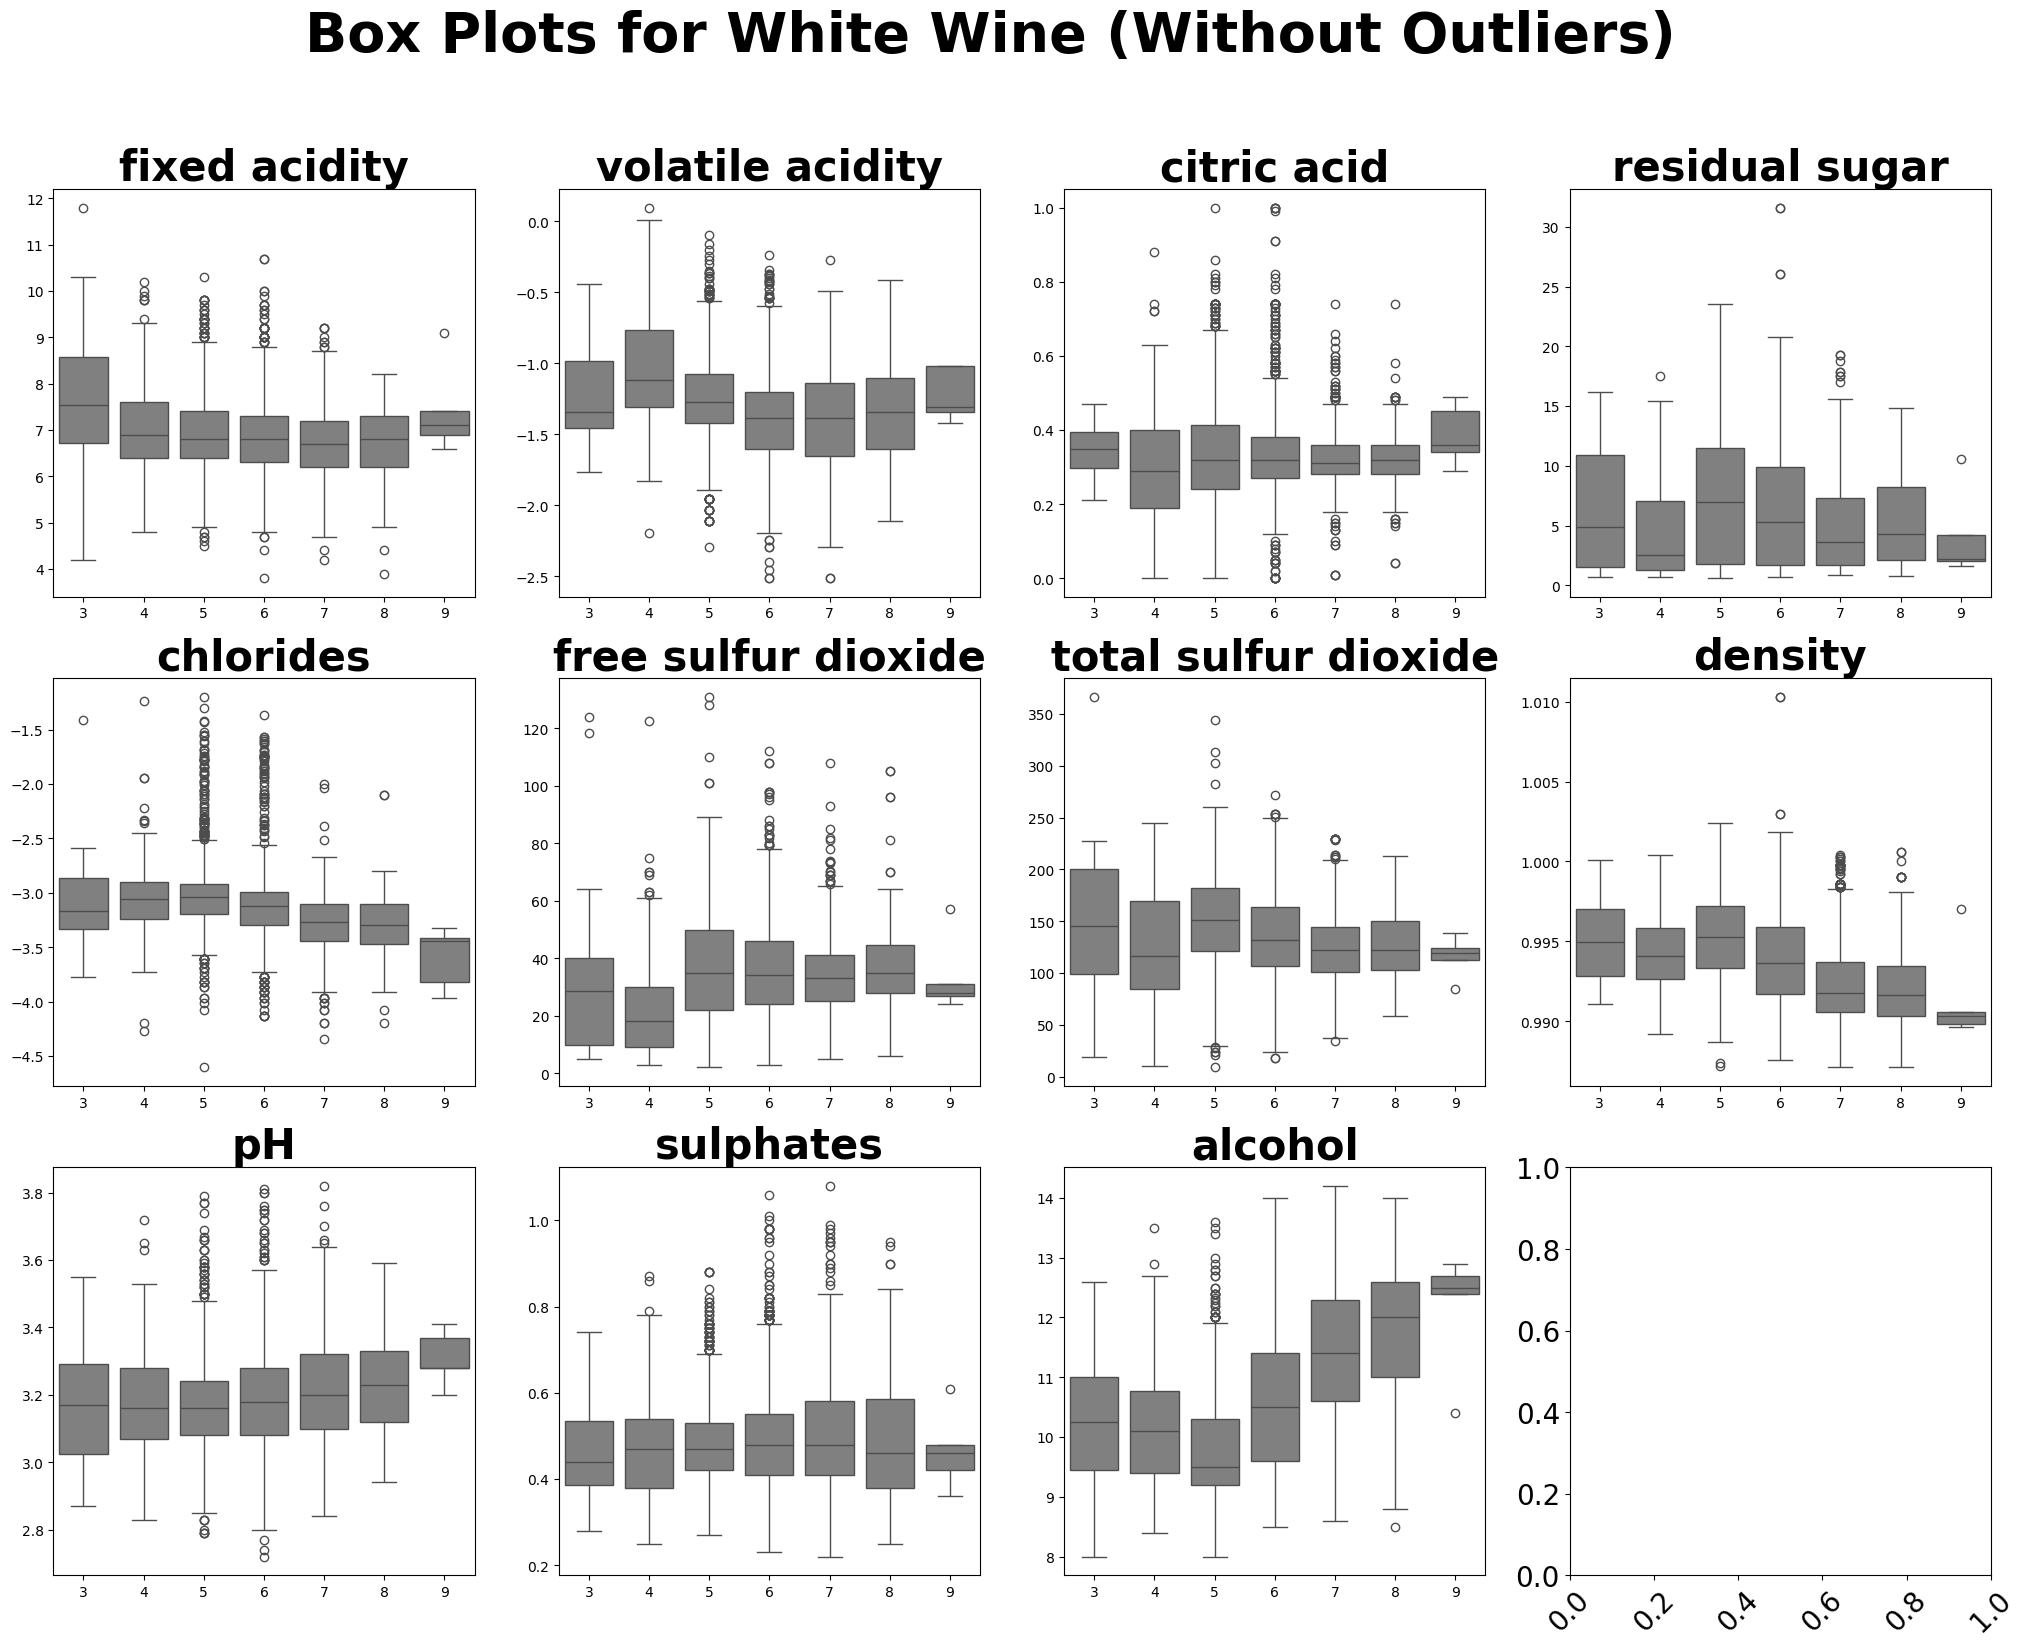

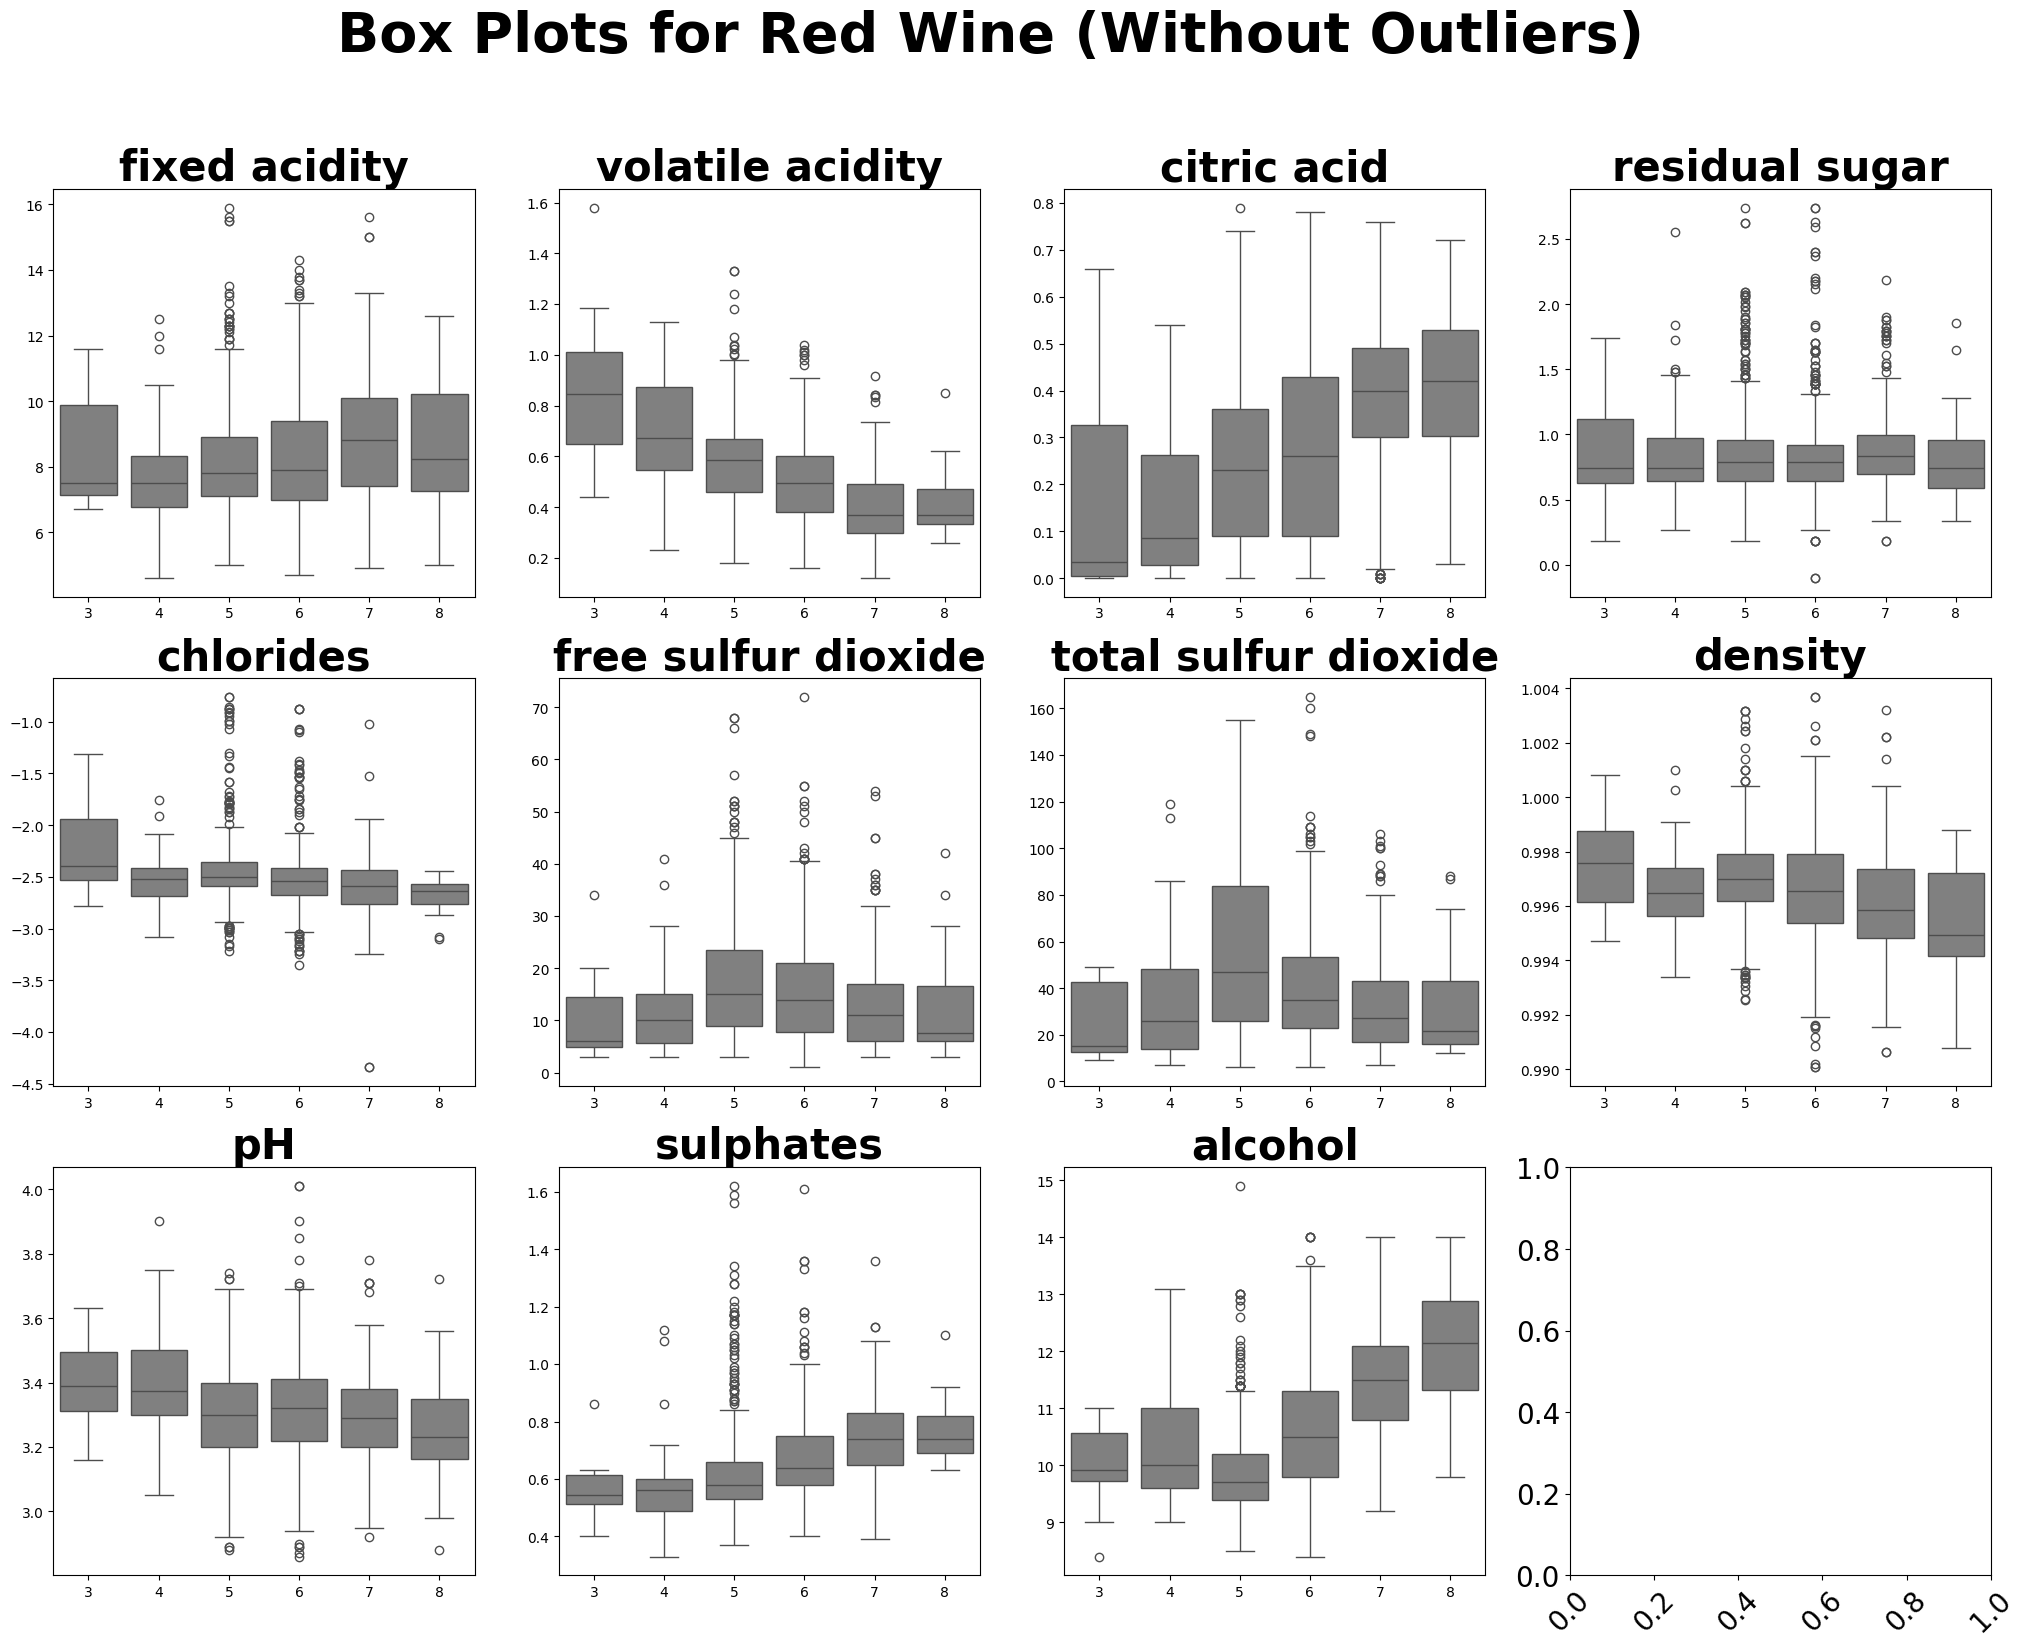

In [135]:
create_plots(create_box_plot, '2_Boxplots_without_outliers', wine_without_outliers_dfs)

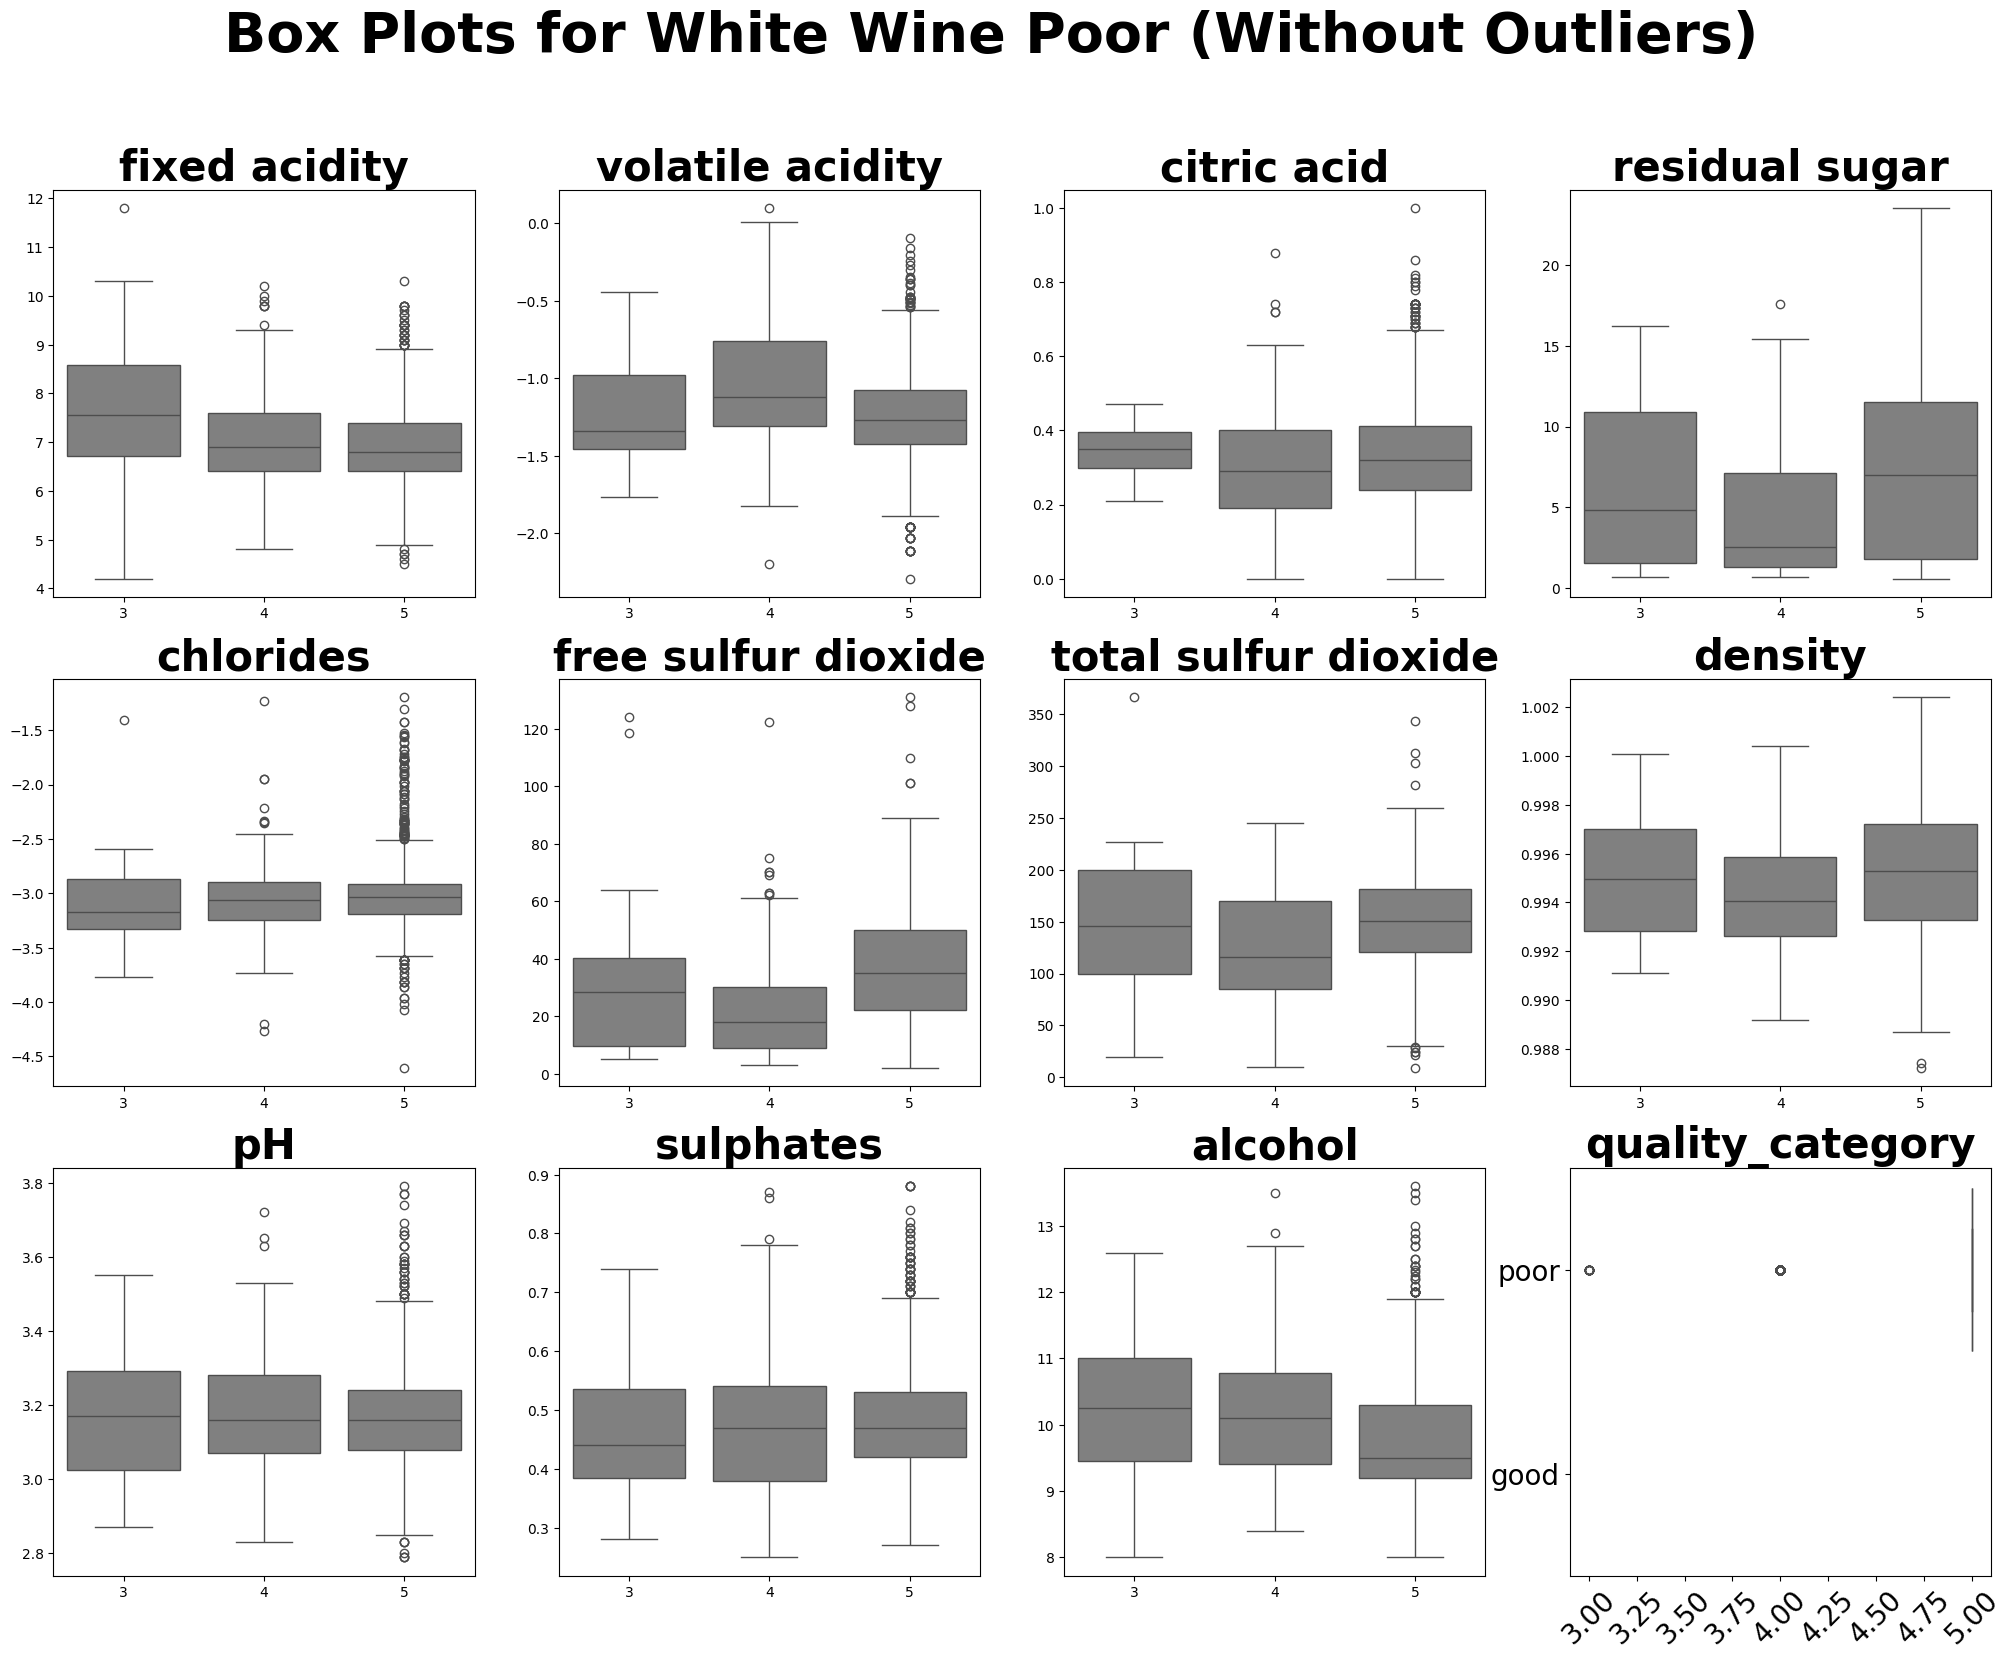

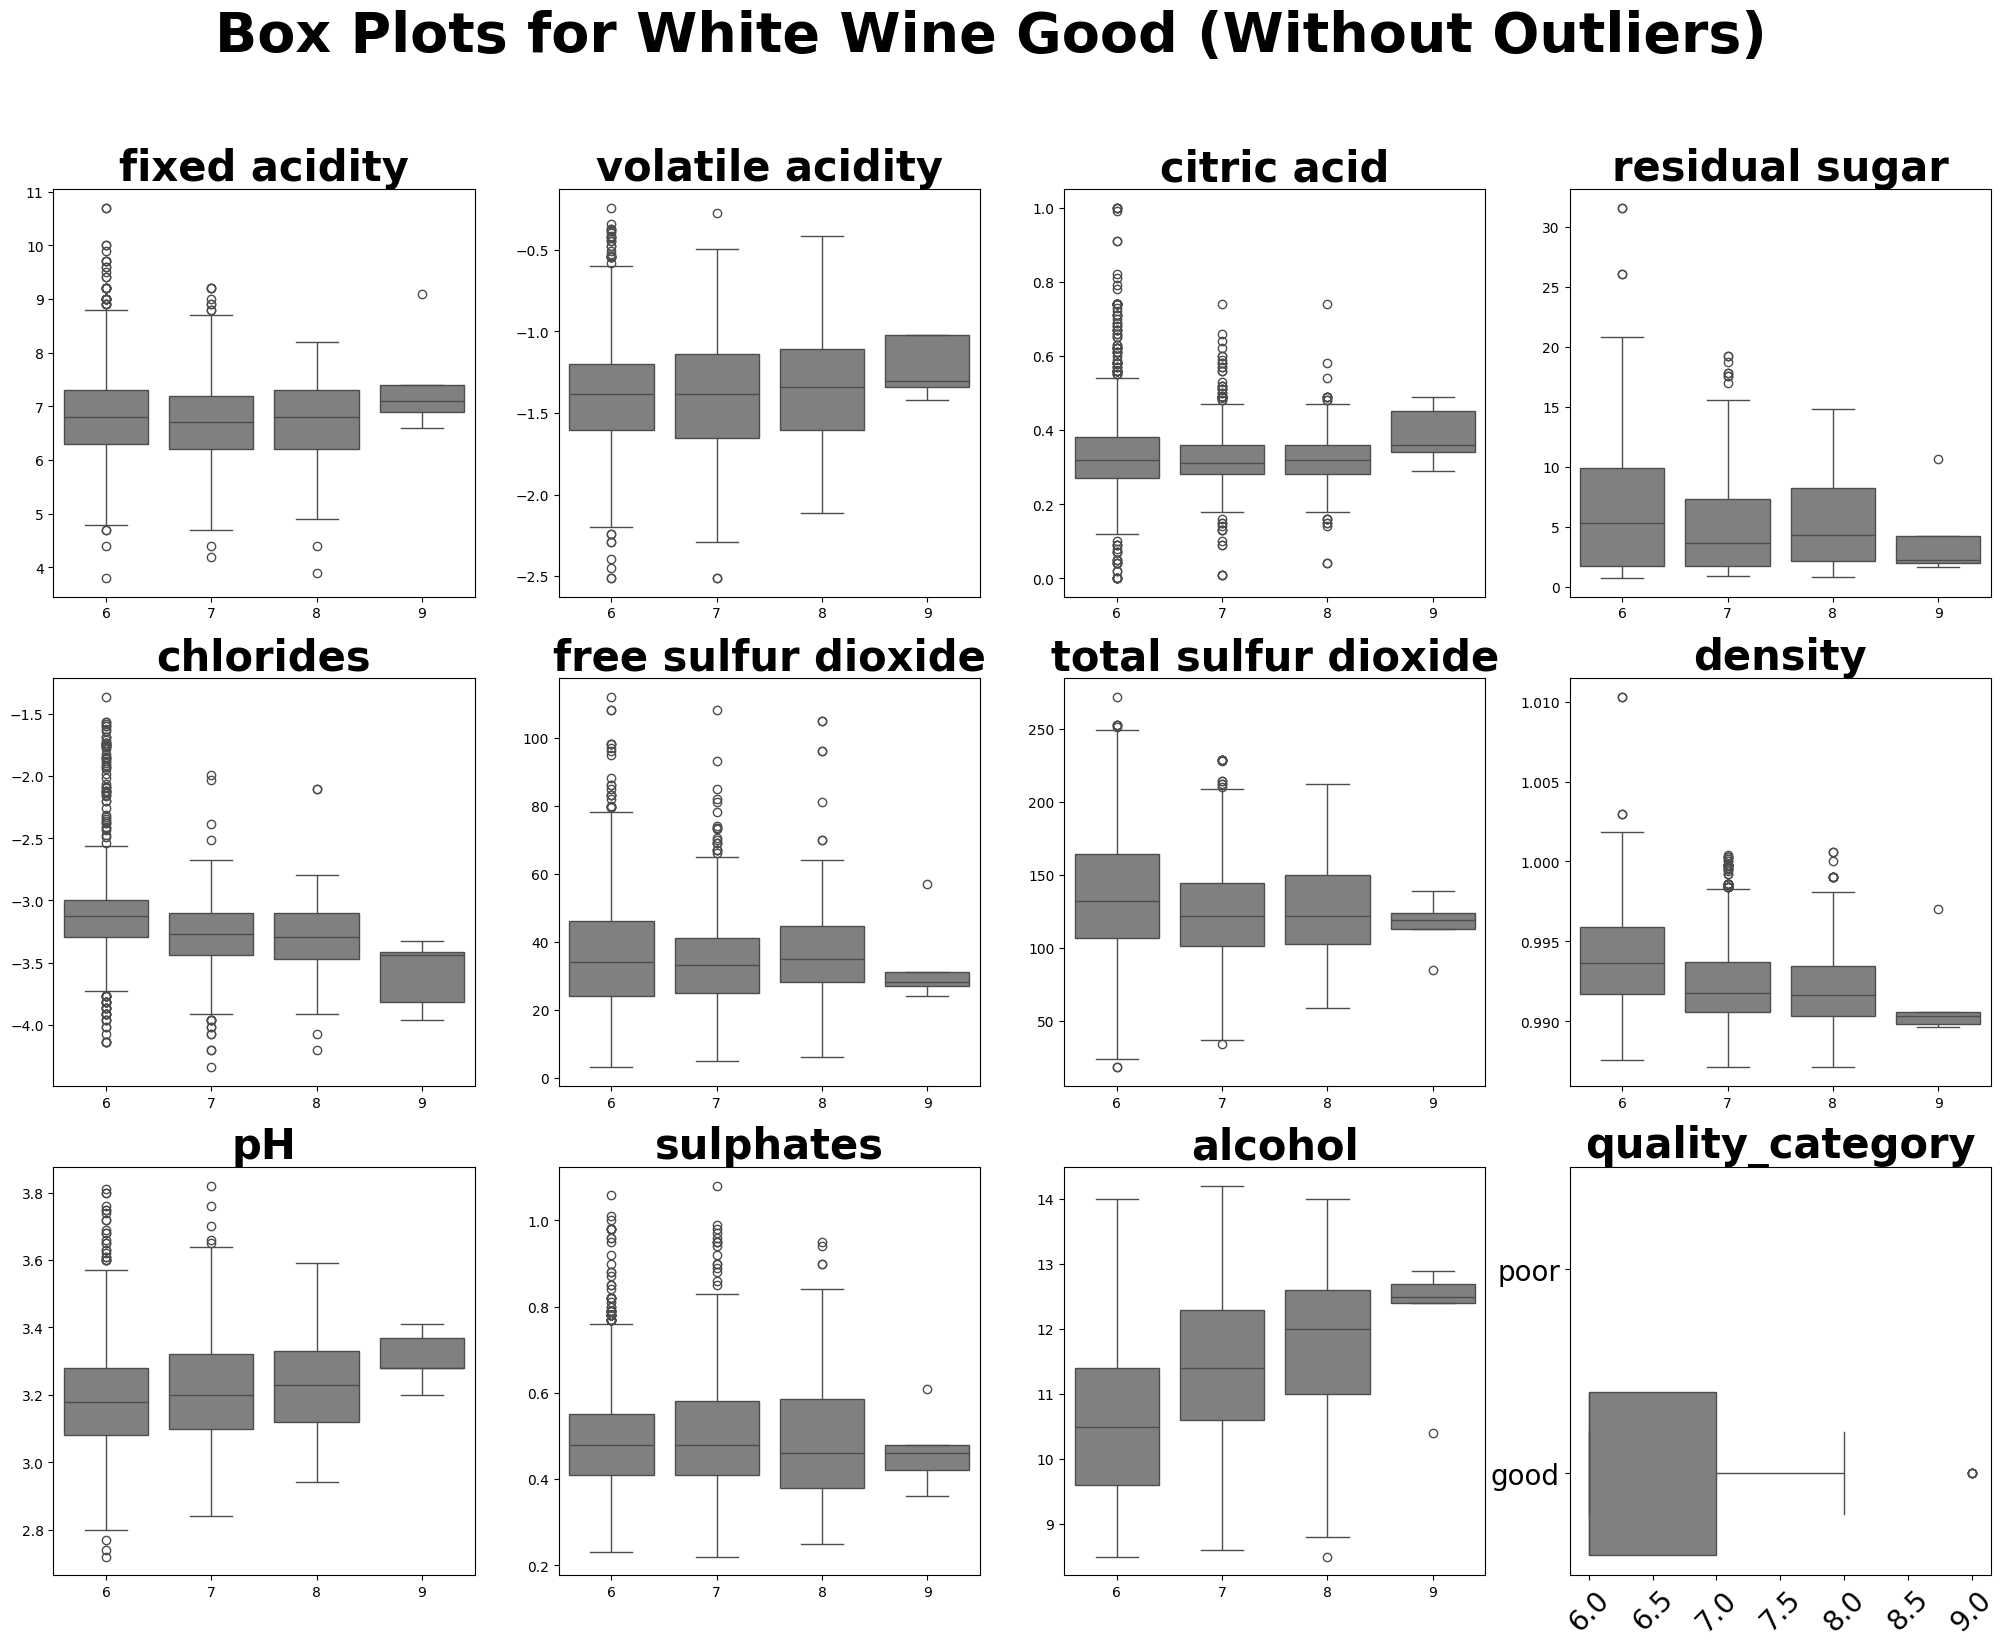

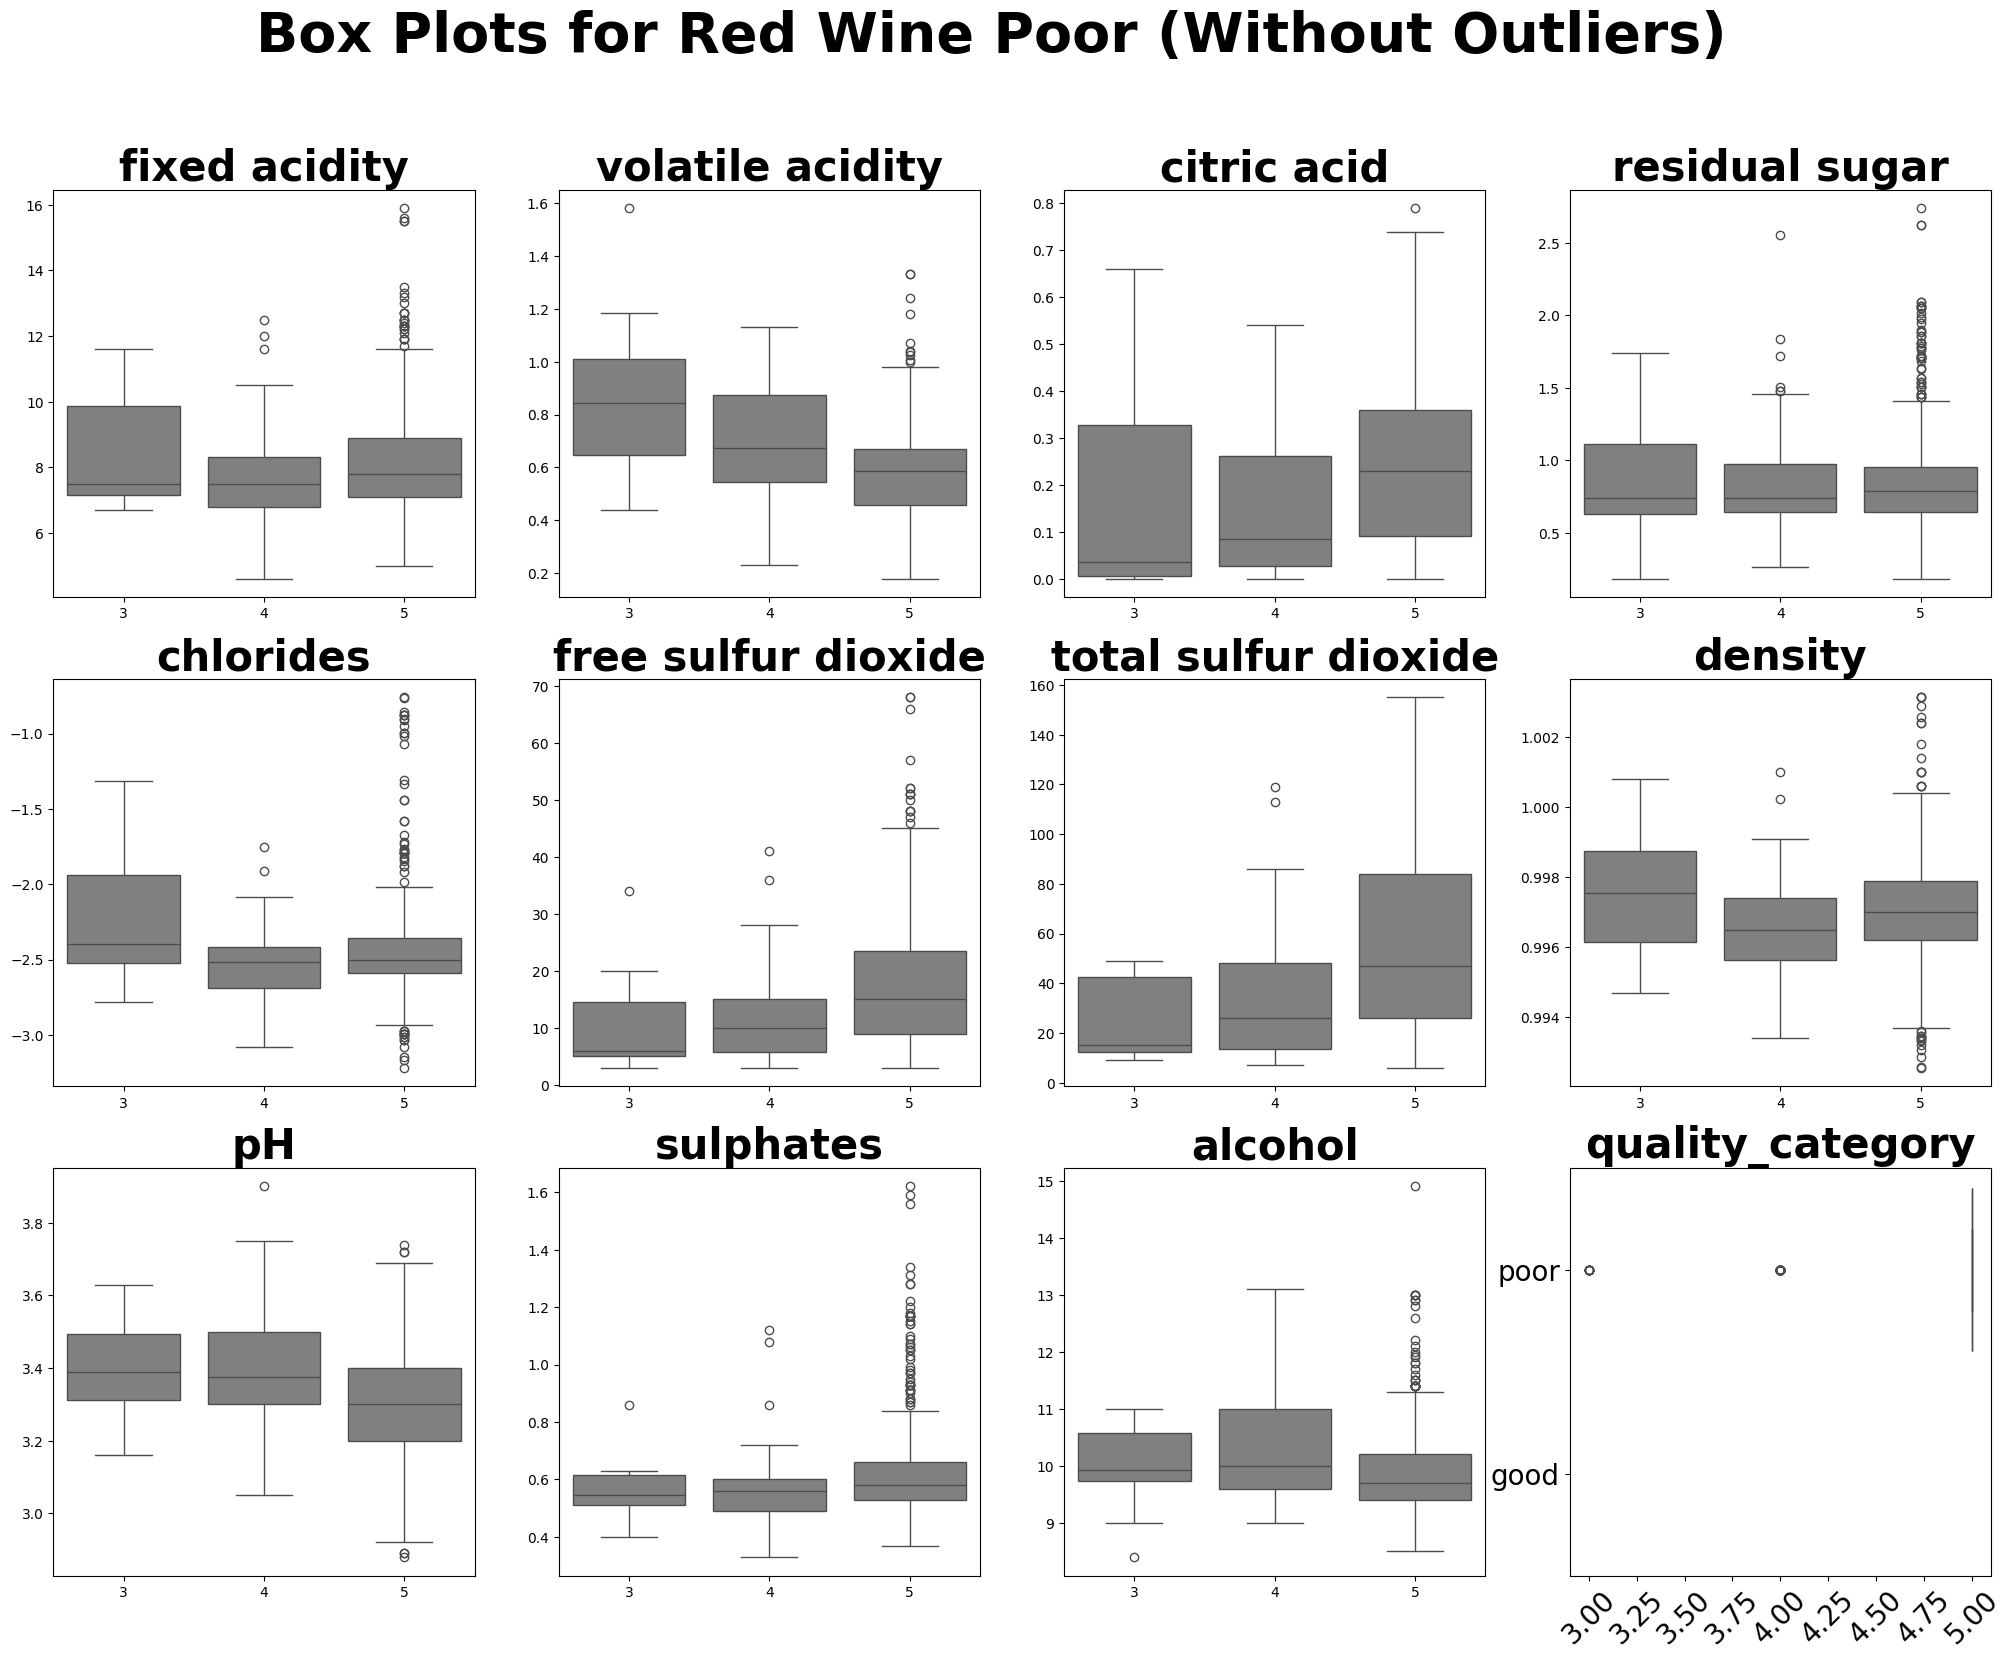

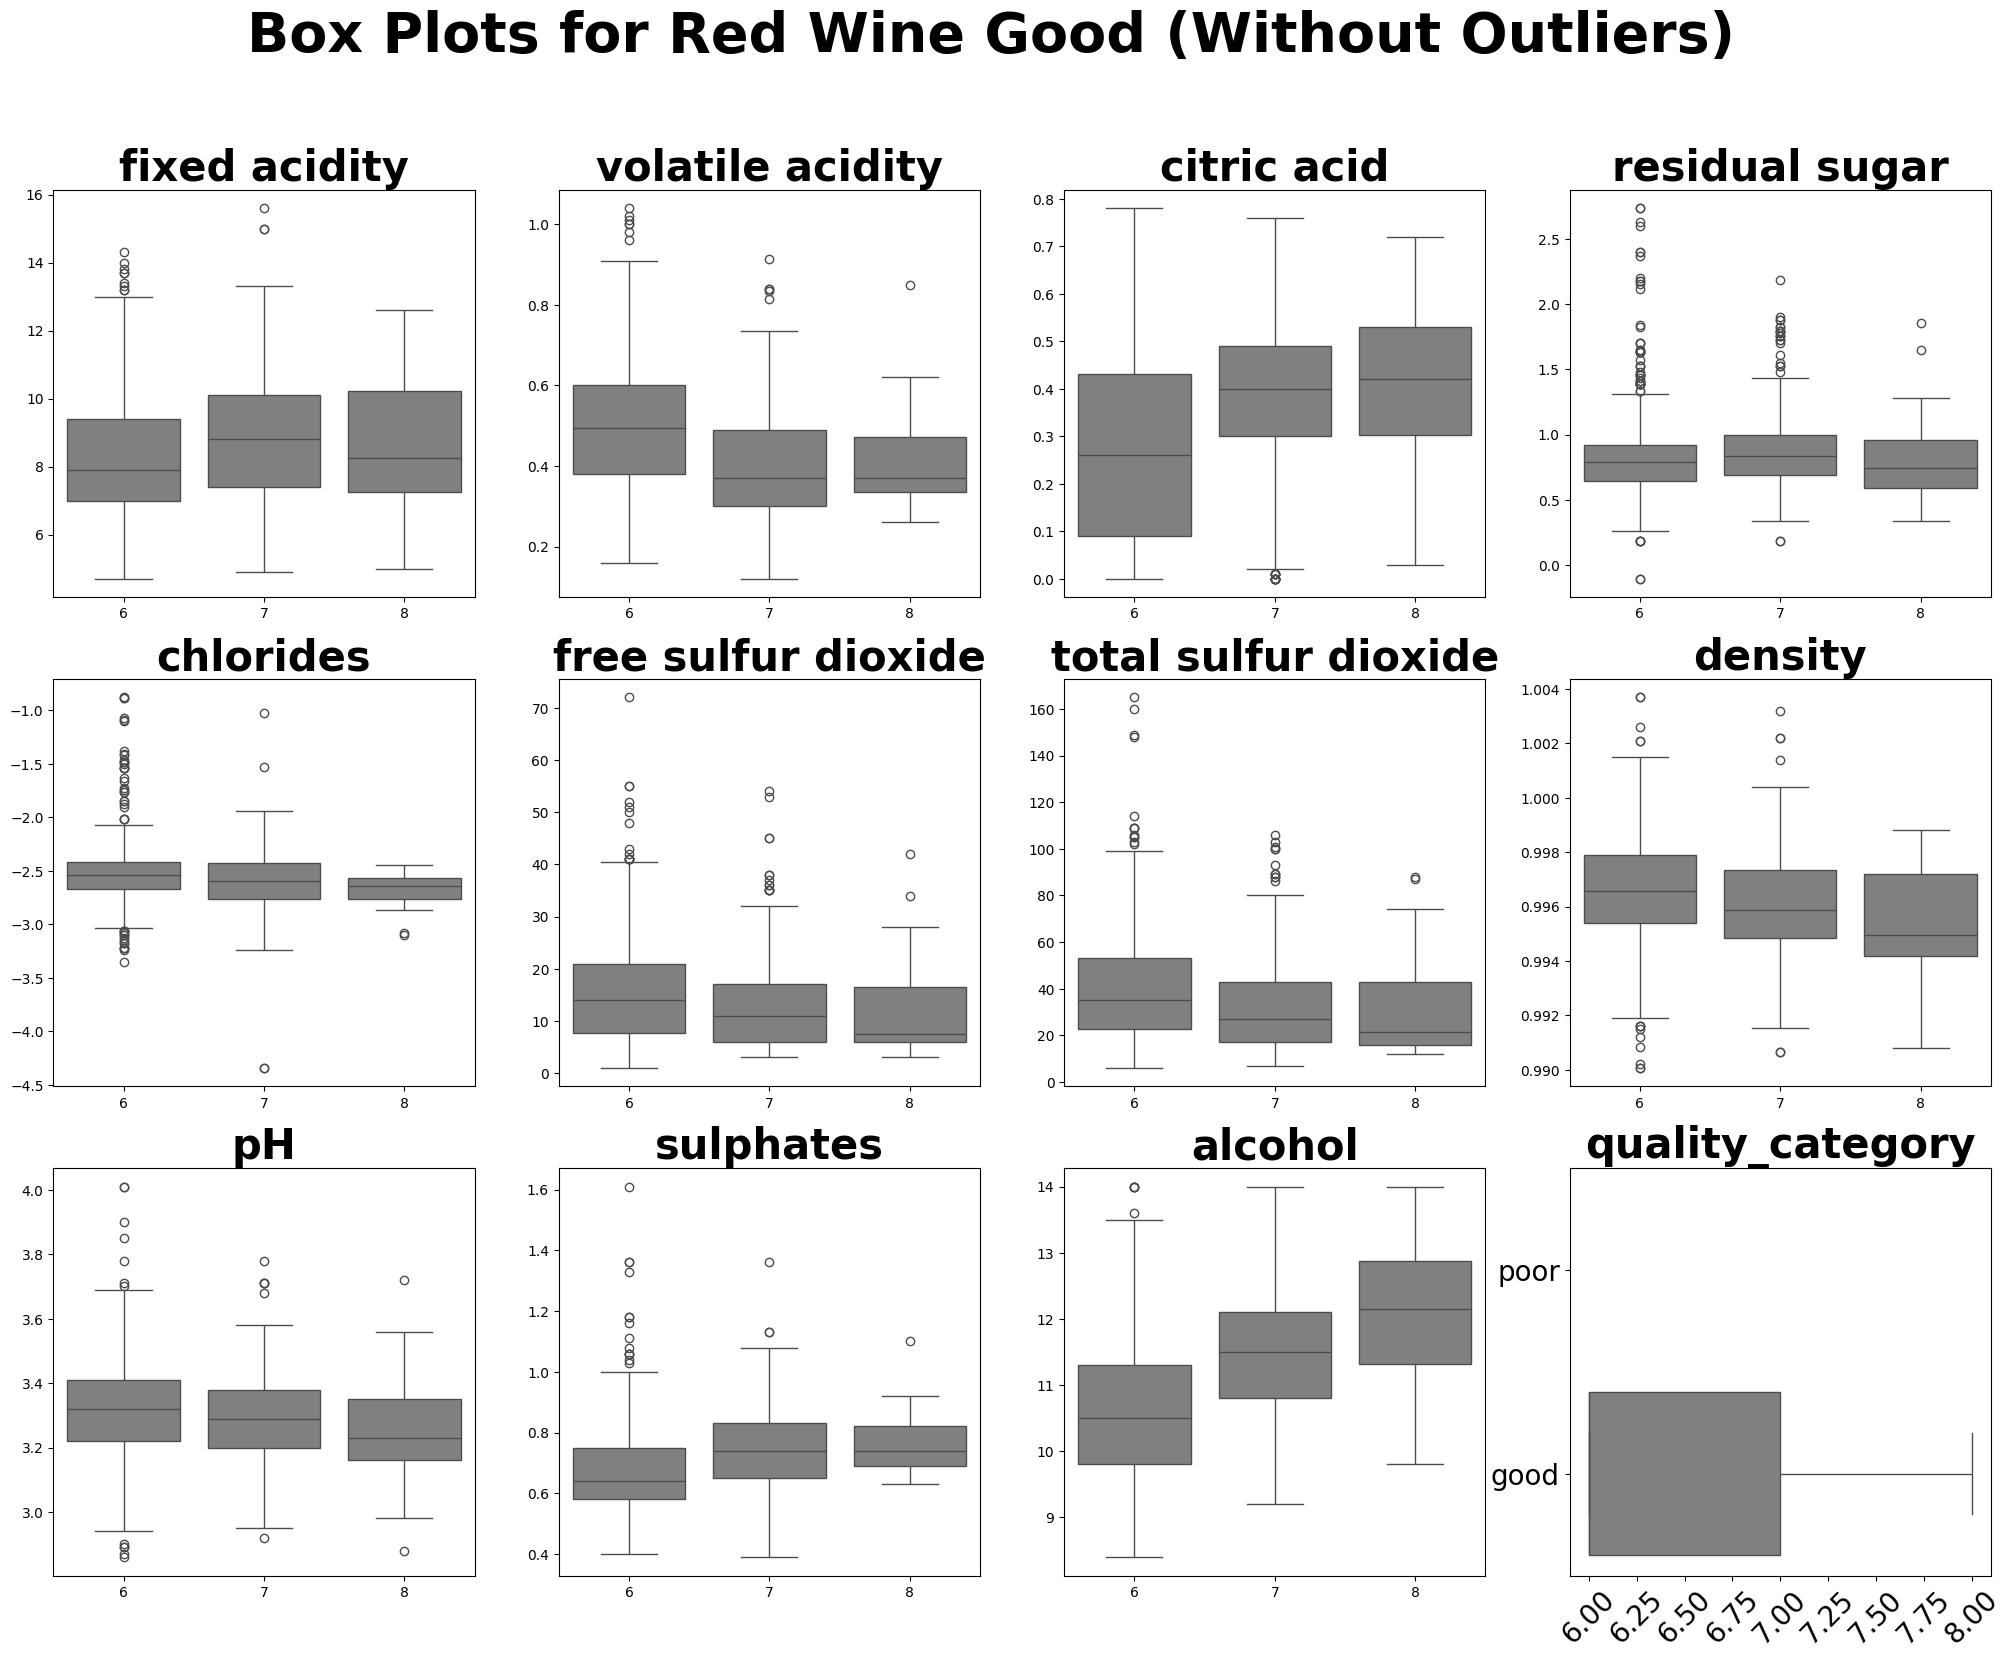

In [137]:
create_plots(create_box_plot, '3_Boxplots_quality_without_outliers', wine_quality_without_outliers_dfs)

## 4.1 Visualize Final Data

1) Histograms of quality distribiution for each of the wine type

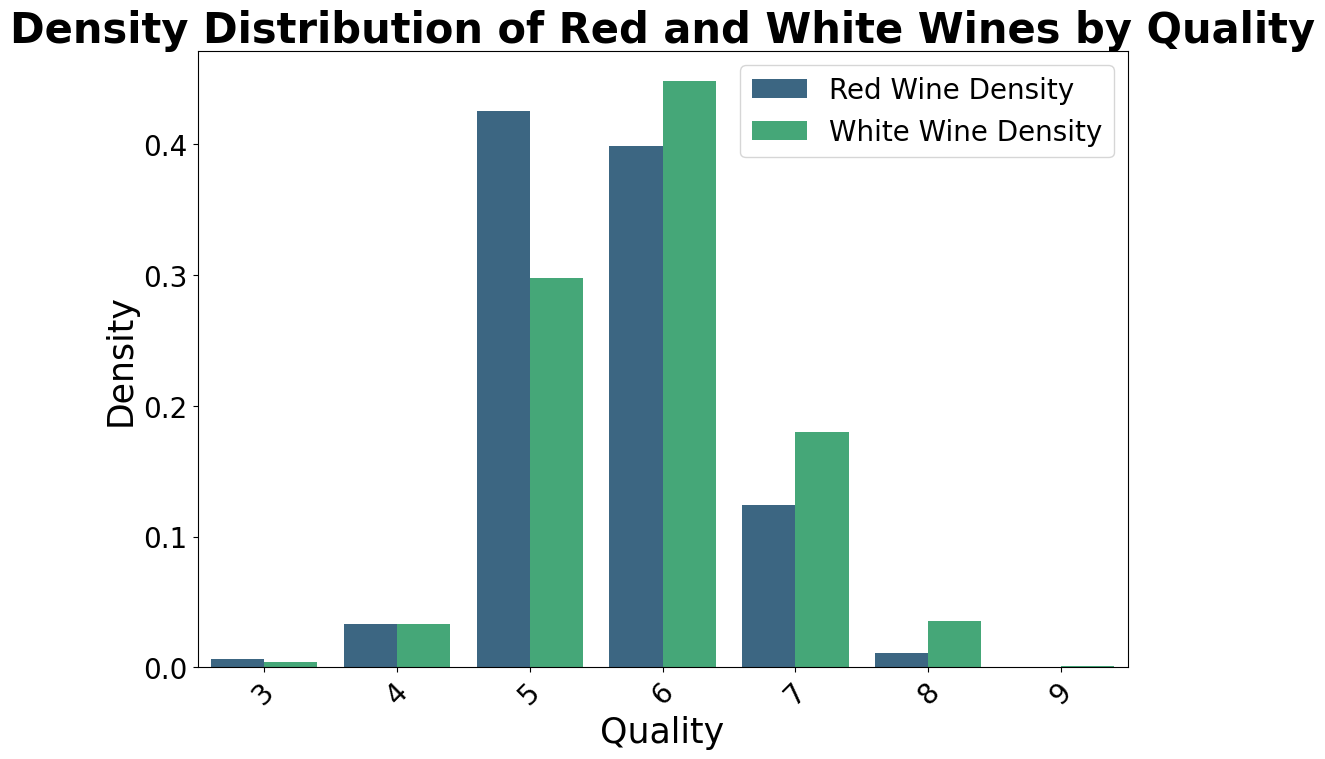

In [138]:
# getting quality counts for red and white wines and sort them by quality
red_quality_counts = df_red_wine['quality'].value_counts().sort_index()
white_quality_counts = df_white_wine['quality'].value_counts().sort_index()

# normalize the counts to get densities
red_density = red_quality_counts / red_quality_counts.sum()
white_density = white_quality_counts / white_quality_counts.sum()

# convert to DataFrame
red_df = red_density.reset_index().rename(columns={'index': 'Quality', 'quality': 'quality'})
white_df = white_density.reset_index().rename(columns={'index': 'Quality', 'quality': 'quality'})
merged_df = pd.merge(red_df, white_df, on='quality', how='outer').fillna(0)
bar_plot_df = merged_df.rename(columns={'count_x': 'Red Wine Density', 'count_y': 'White Wine Density'})

# match columns for both features
melted_df = pd.melt(bar_plot_df, id_vars='quality', var_name='Wine Type', value_name='Density')

# plotting
plt.figure(figsize=(12, 8))
sns.barplot(x='quality', y='Density', hue='Wine Type', data=melted_df, palette='viridis')

# description
plt.title('Density Distribution of Red and White Wines by Quality', fontsize=30, weight ='bold')
plt.xlabel('Quality',  fontsize=25)
plt.ylabel('Density', fontsize=25)
plt.xticks(rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

# save fig
plt.savefig('figures/Density Distribution of Red and White Wines by Quality.png', bbox_inches = 'tight')
plt.show()

2) Raw Clustermap of our cleaned data

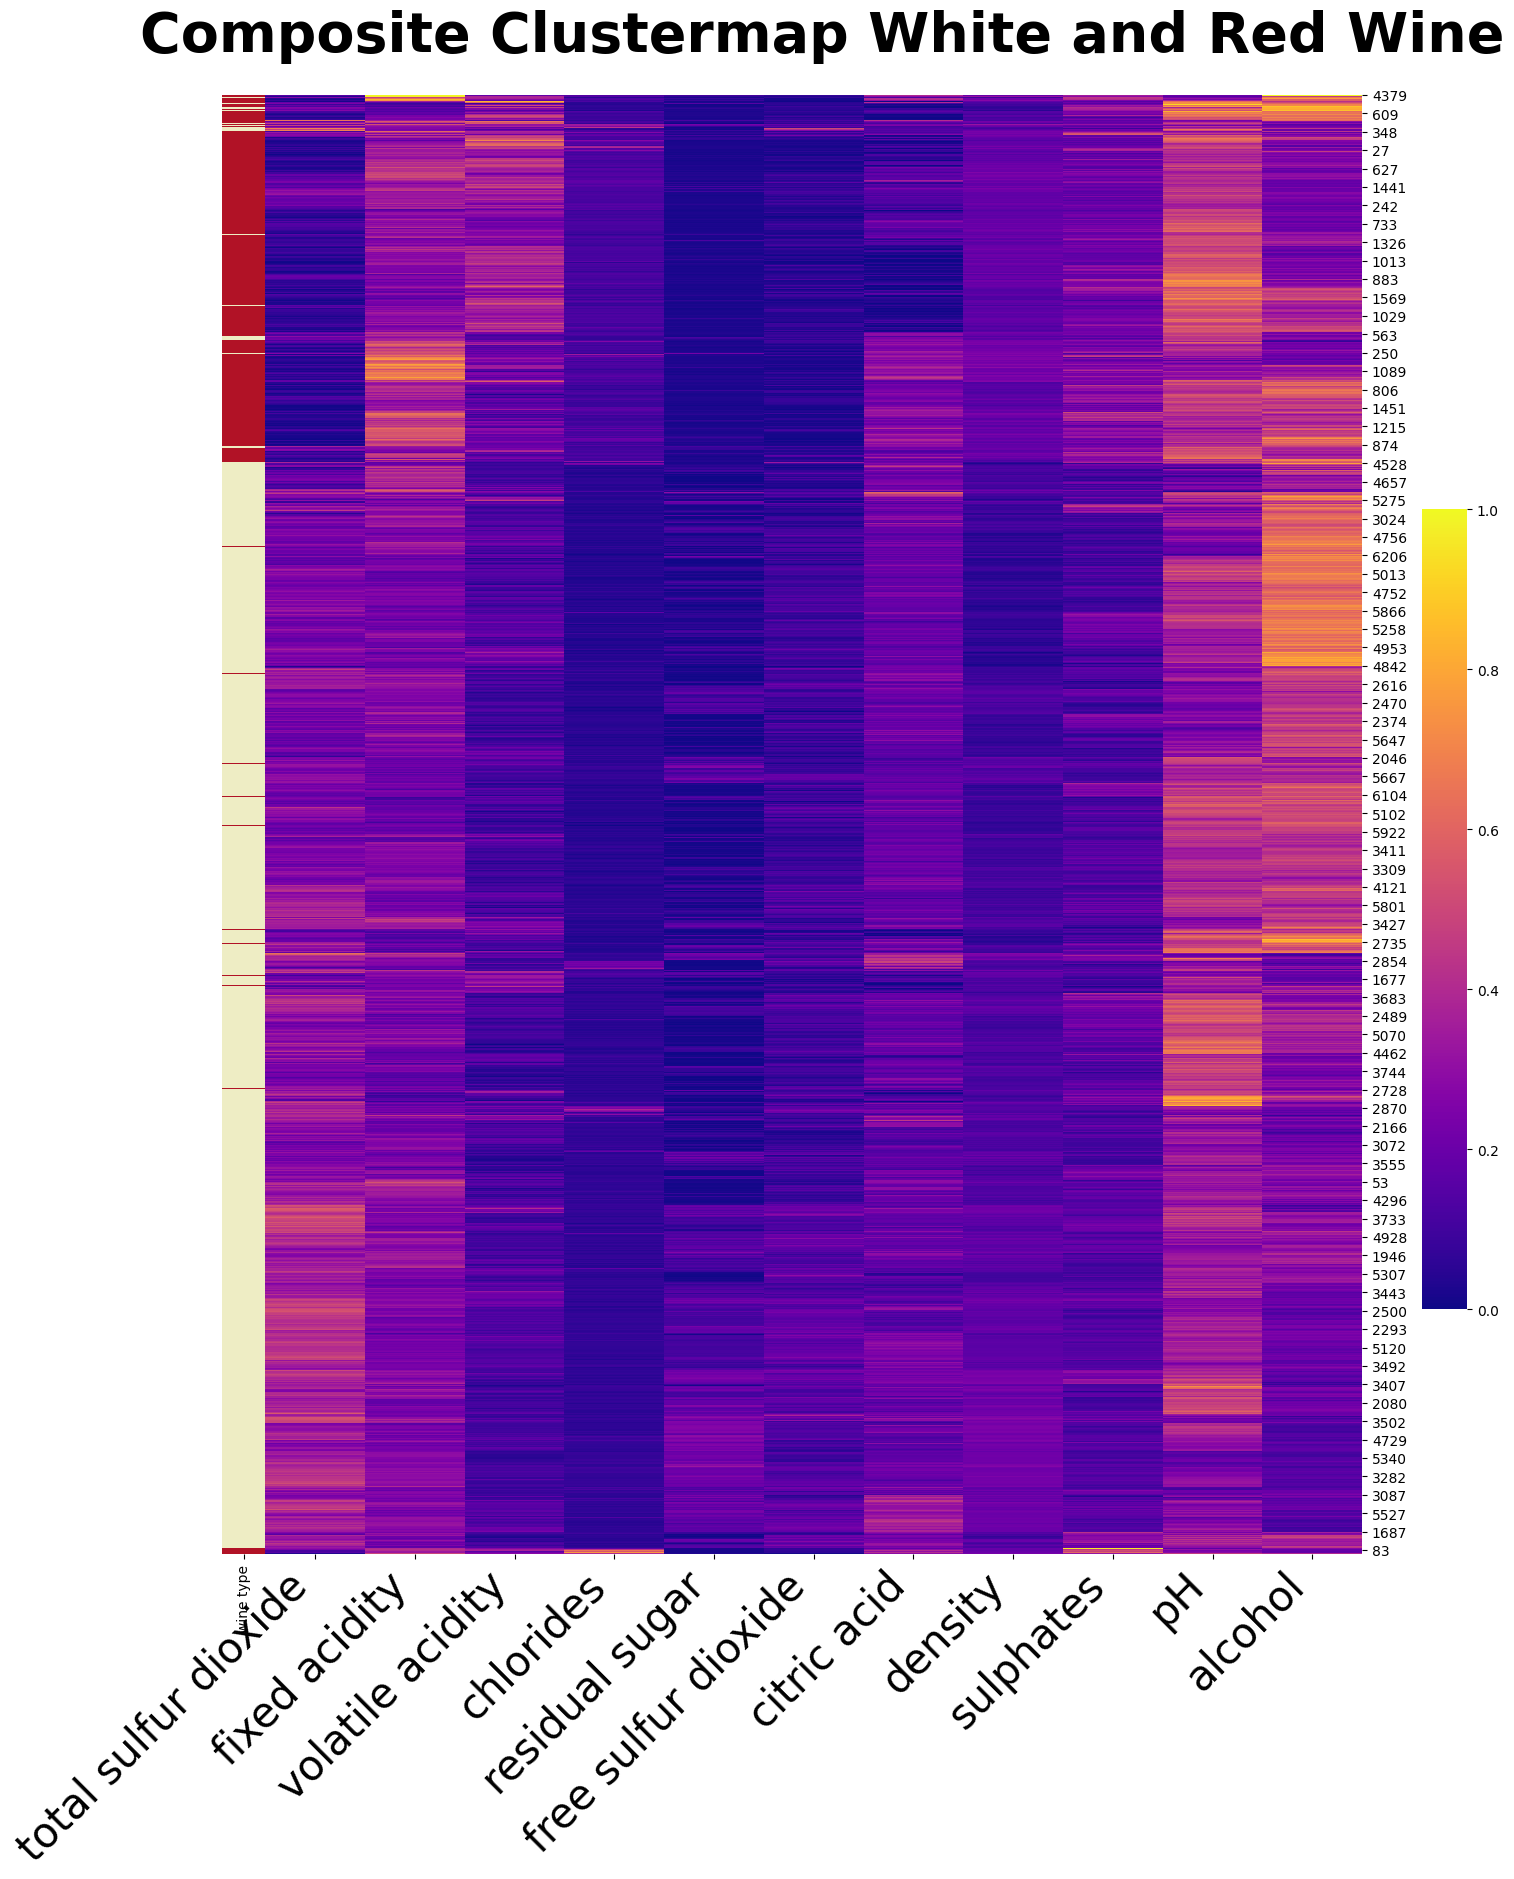

In [ ]:
# create labels of color to our data
df_red_wine['color'] = 1
df_white_wine['color'] = 2

df_wine = pd.concat([df_red_wine, df_white_wine[1:]], axis=0).reset_index(drop=True)

def create_cluster_by_rows(dataset):
    '''
    Displays a clustermap plot with labels.

    Parameters:
    - dataset (pandas.DataFrame): The DataFrame containing data related to red and white wines.
    '''
    # select numerical columns from the dataset
    data = dataset.select_dtypes(include=['number'])

    # extract and remove the 'color' column from the data
    agerange = data.pop("color")

    # define color mapping for wine types labels
    colors_of_labels = {1: "#b11226", 2: "#EEEDC4"}

    # Map wine types to colors
    labels = agerange.map(colors_of_labels)
    df_with_labels = pd.DataFrame(data={'wine type': labels})

    # create the clustermap
    g = sns.clustermap(df_wine.iloc[:,:-2], cmap='plasma', row_colors=df_with_labels, annot_kws={'size': 30}, 
                standard_scale=1, figsize=(15, 20))

    # Hide row and column dendrograms 
    g.ax_row_dendrogram.set_visible(False)
    g.ax_col_dendrogram.set_visible(False)    

    # describe
    title = 'Composite Clustermap White and Red Wine'
    plt.suptitle('Composite Clustermap White and Red Wine', fontsize=40, weight ='bold',y= 0.85, x = 0.60)
    plt.setp(g.ax_heatmap.get_xticklabels(), fontsize=30, rotation = 45, ha='right')
    g.ax_cbar.set_position((1, .2, .03, .4))

    plt.savefig(f'figures/{title}.png', bbox_inches = 'tight')
    plt.show()

create_cluster_by_rows(df_wine)


## 5. Model creation

Firstly, for the model we have the choose which features we want to use.

-> Create clustermap and heatmap to understant the relationship between features and wine quality score.

### Comments about clustermap:
- Our model's performance is influenced by the considerable multicollinearity observed in the data. Identifying features with minimal correlation is essential. 
- To achieve this, we compare different feature lists, selecting one from closely correlated pairs for model evaluation. Each model is restricted to a maximum of 8 features. This approach aims to uncover independent and meaningful predictors for the development of an optimal model.

In [151]:
def create_corr_matrix(wine_type_df):
    """
    Create and return the correlation matrix for the numeric columns in the given df.

    Parameters:
    - wine_type_df (pandas.DataFrame): DataFrame that we want to do matrix on

    Returns:
    The correlation matrix for the numeric columns
    """
    numeric_columns = check_numeric_columns(wine_type_df)
    return wine_type_df[numeric_columns].corr()


def create_clustermap(wine_type_df, folder):
    """
    Create and display a clustermap of the correlation matrix for the df.

    Parameters:
    - wine_type_df (pandas.DataFrame): The DataFrame that we want to display clustermap
    """
    # create the correlation matrix
    correlation_matrix = create_corr_matrix(wine_type_df)
    
    # calculate p-values for each correlation coefficient
    pvalues = correlation_matrix.apply(lambda x: 
                                       correlation_matrix.columns.map(lambda y: 
                                                                      pearsonr(wine_type_df[x.name], wine_type_df[y])[1]))
    
    # create the mask for non-significant correlations (p-value > 0.05)
    mask_significant = pvalues > 0.05
    
    # create and display the clustermap
    g = sns.clustermap(correlation_matrix, 
                       mask=mask_significant, annot=True, 
                       cmap='seismic', 
                       row_cluster=True, 
                       col_cluster=True,
                       linewidths=.5, vmax=1, vmin=-1, annot_kws={'size': 10},
                       figsize=(12, 12))
    
    # hide column dendrogram
    g.ax_col_dendrogram.set_visible(False)
    
    # descrption
    title=f'Correlation Matrix Clustermap for {get_wine_str(wine_type_df)}'
    g.fig.suptitle(title, fontsize=20, weight='bold' , y=0.85)
    plt.setp(g.ax_heatmap.get_xticklabels(), fontsize=12, rotation=45, ha='right')
    plt.setp(g.ax_heatmap.get_yticklabels(), fontsize=12)
    g.ax_cbar.set_position((1, .2,.03, .4))
    
    # save
    
    plt.savefig(f'figures/{folder}/{title}.png', bbox_inches = 'tight')
    plt.show()


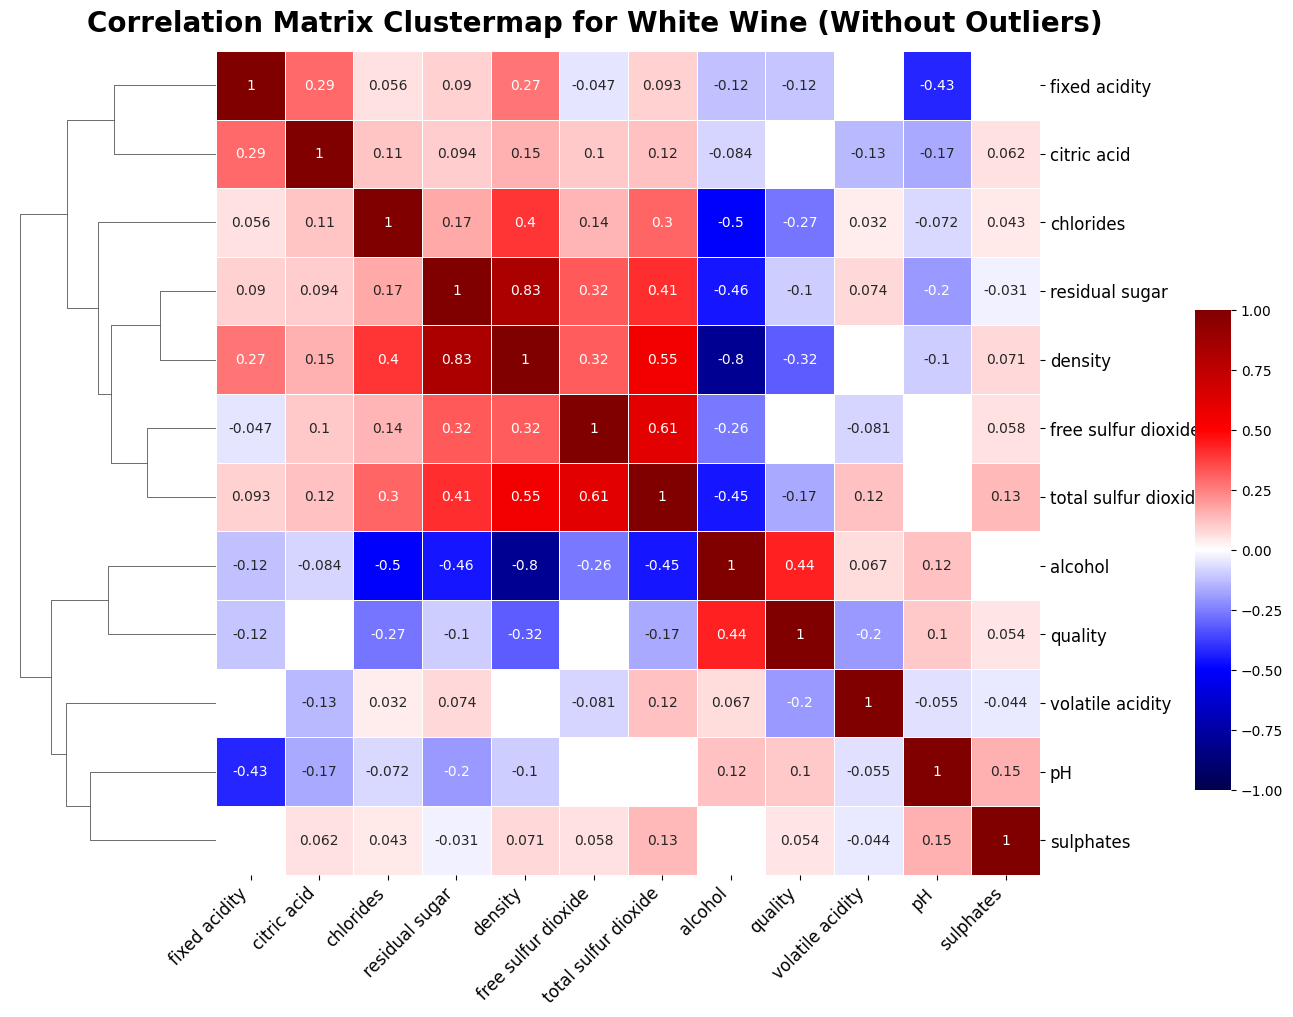

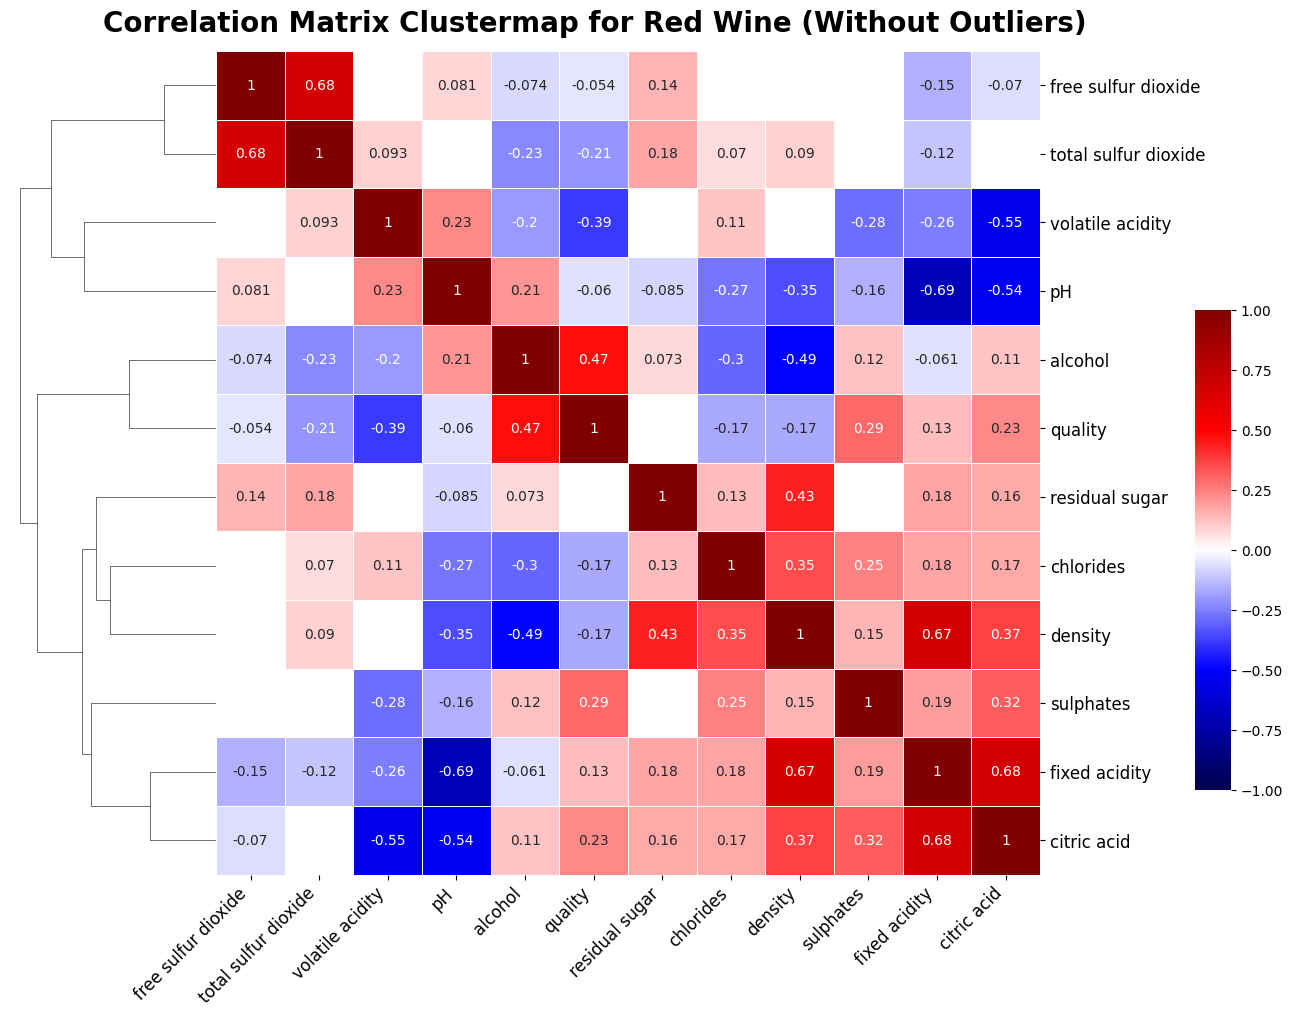

In [152]:
create_plots(create_clustermap, '1_Clustermaps_wine_type', wine_without_outliers_dfs)

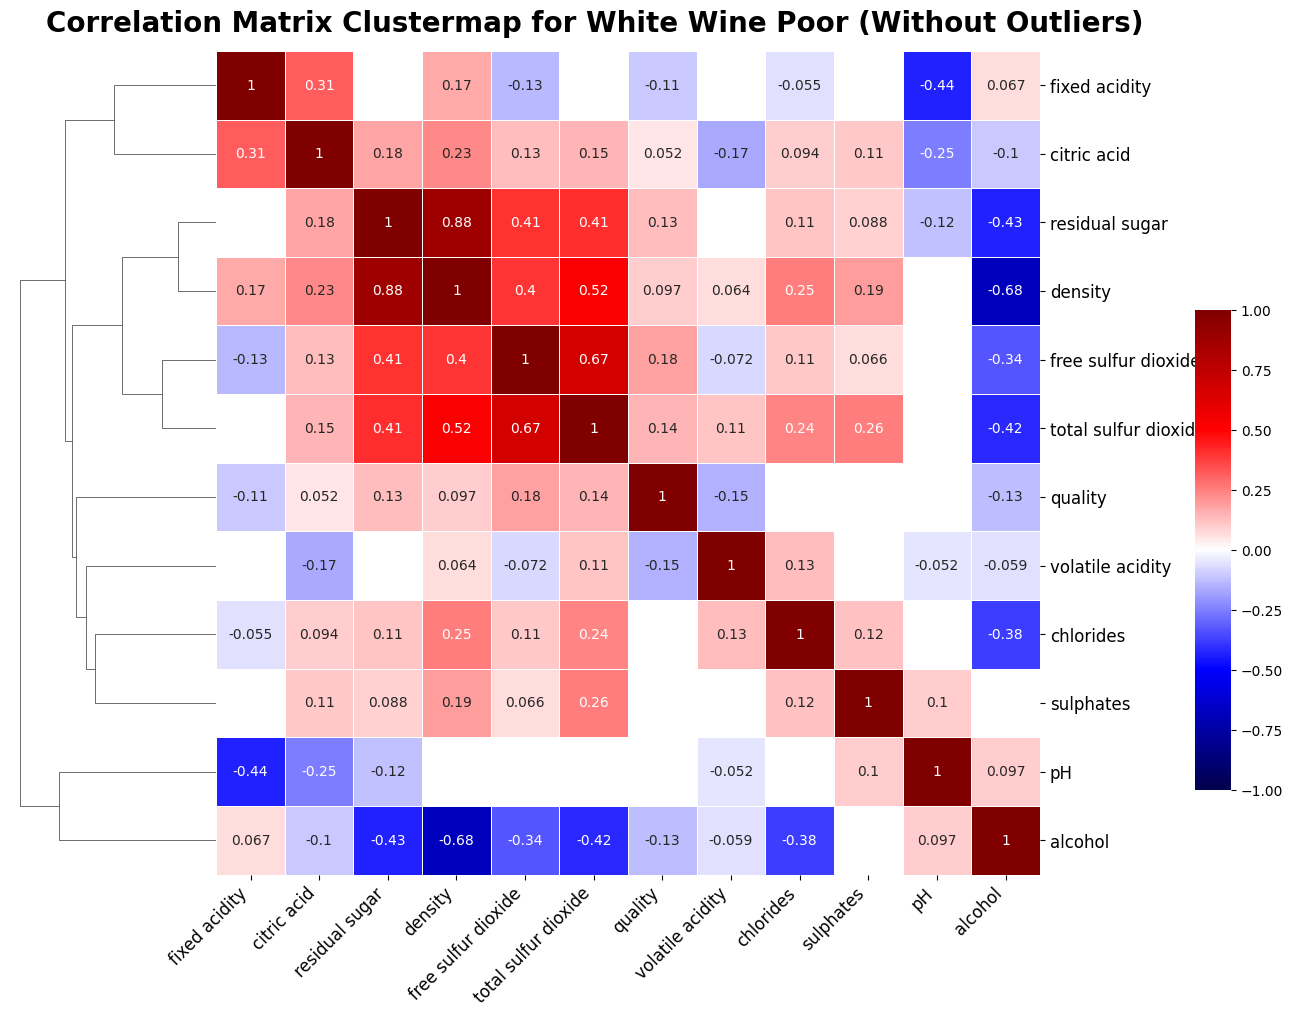

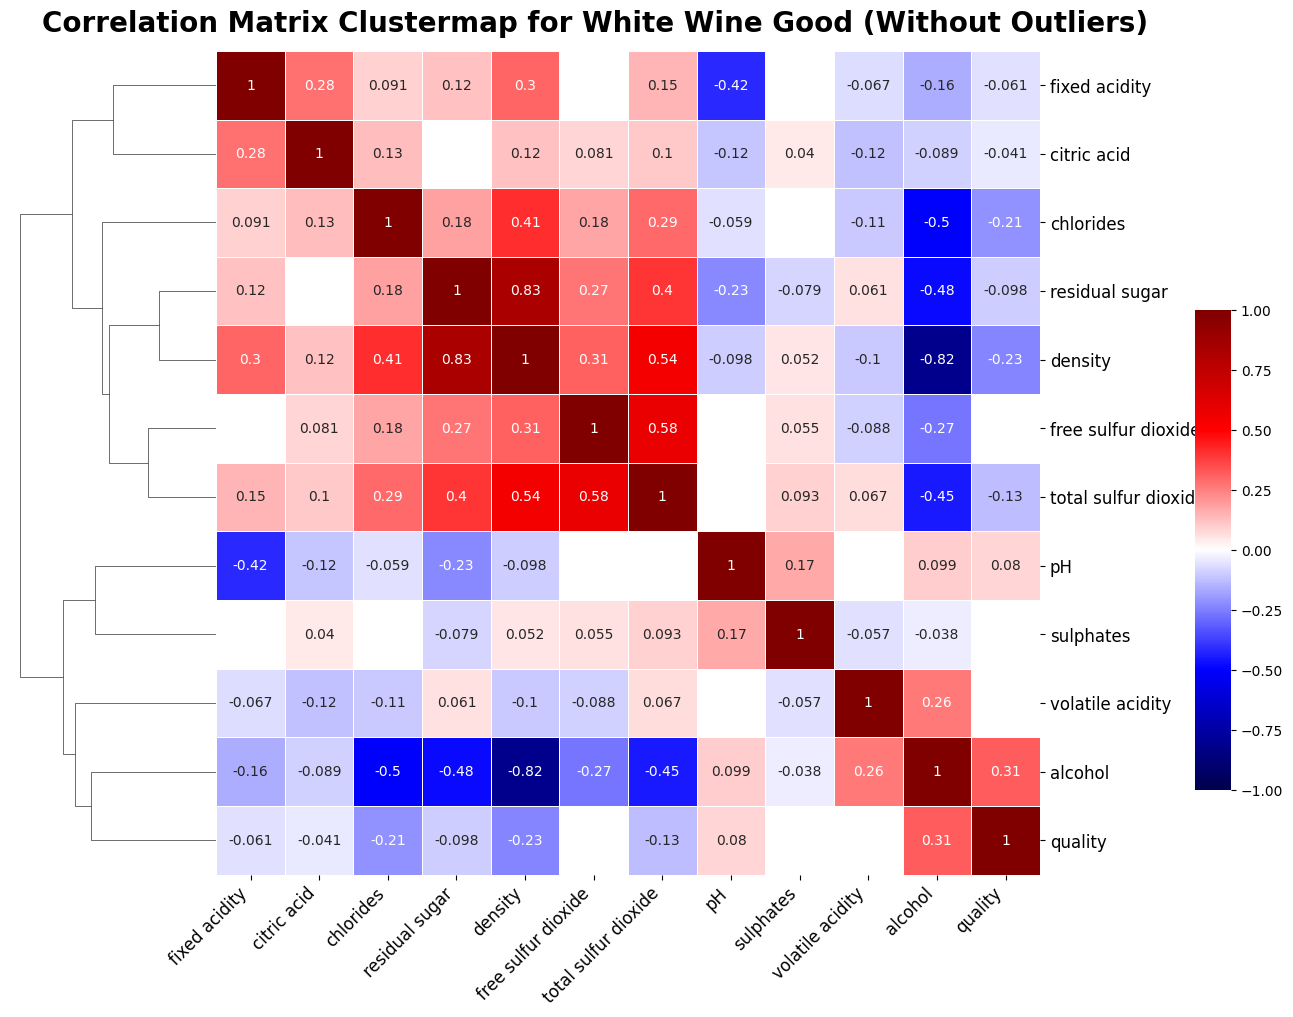

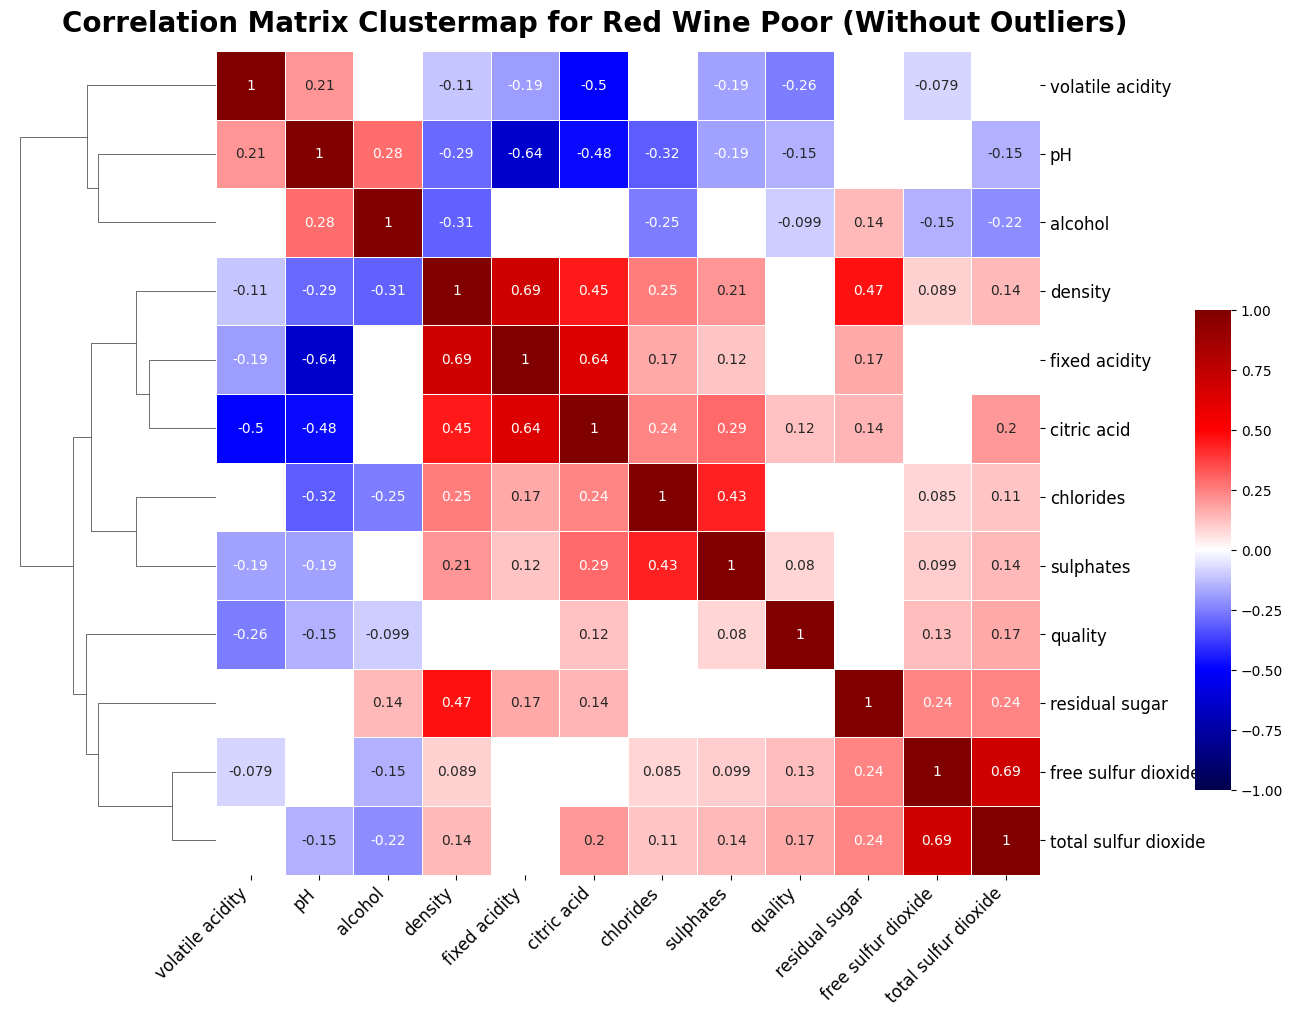

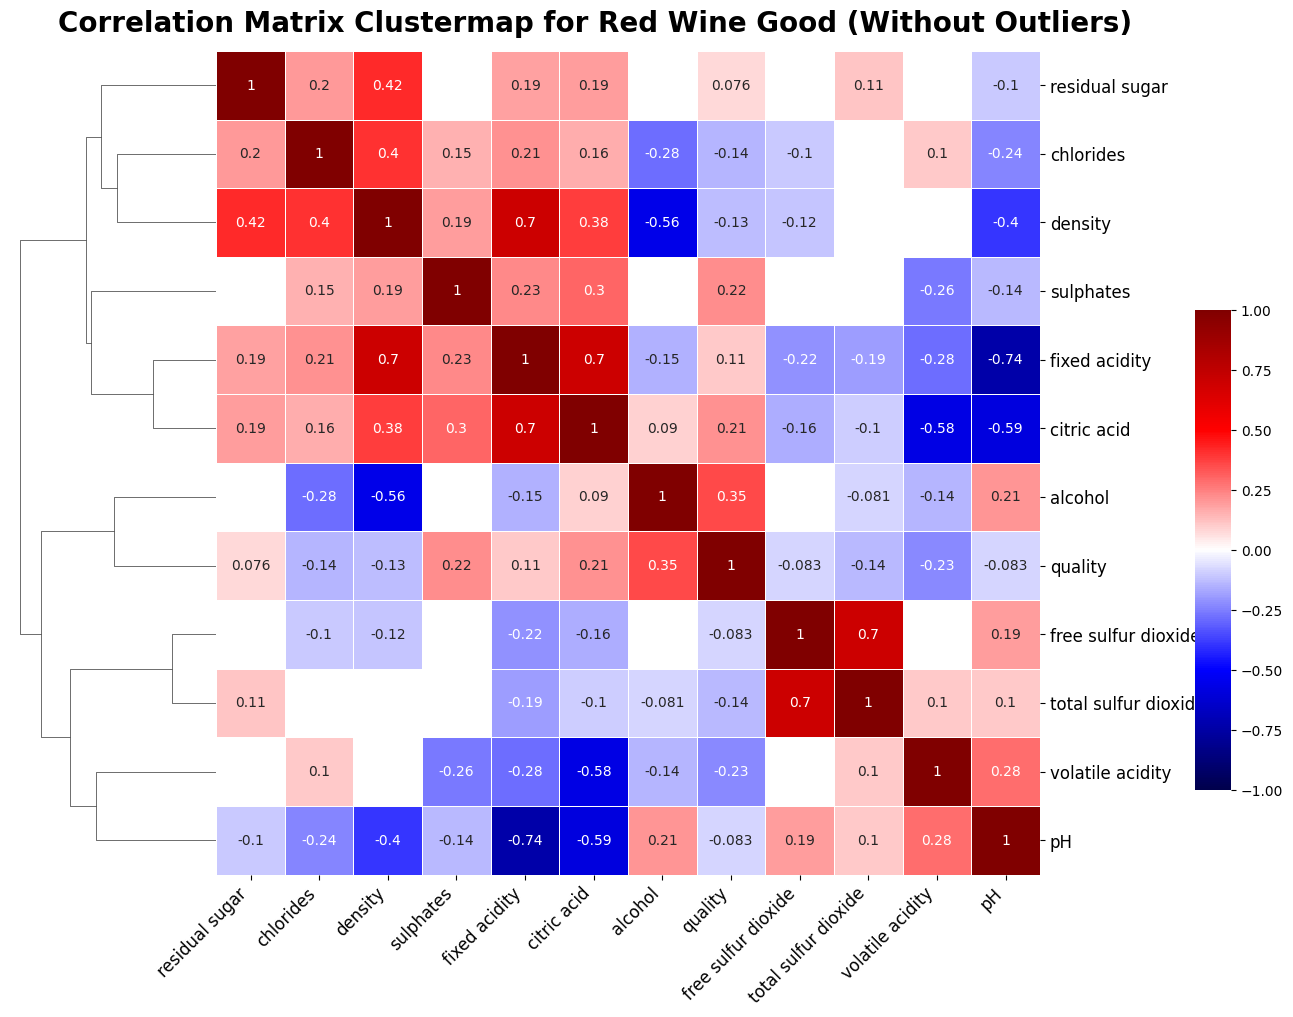

In [153]:
create_plots(create_clustermap, '2_Clustermaps_quality_without_outliers', wine_quality_without_outliers_dfs)


###  5.1 Creating features lists for models to find the best combination

In [154]:
def create_corr_with_target(wine_type_df, target = 'quality'):
    correlation_matrix = create_corr_matrix(wine_type_df)
    correlation_with_target = correlation_matrix[target].sort_values(key=abs, ascending=False)

    return correlation_with_target


def return_top_features_with_target(wine_type_df, n = 8):
    '''
    A function that return top features that are related to the target column.
    '''
    correlation_with_target = create_corr_with_target(wine_type_df)

    top_features = correlation_with_target[1:n+1].index.tolist() 
    return top_features

In [155]:

def return_features_among_highly_associated(wine_type_df, threshold = 0.6, n =8 ):
    '''
    Any feature that has a correlation greater than threshold with any of the already selected features is not chosen
    '''
    correlation_matrix = create_corr_matrix(wine_type_df)
    correlation_with_target = create_corr_with_target(wine_type_df)
    #print(get_wine_str(wine_type_df))
    # print(correlation_matrix)
    #print(correlation_with_target)

    selected_features = [correlation_with_target.index[1]]  


    for feature in correlation_with_target.index[2:]:
        if all(abs(correlation_matrix[feature][selected_feature]) < threshold for selected_feature in selected_features):
            selected_features.append(feature)
            if len(selected_features) == n: 
                break

    return selected_features

In [156]:
top_features_dict = {}
features_among_highly_associated_dict = {}

def create_features_dict(df_lists):
    for wine_df in df_lists:
        try:
            df_name = get_wine_str(wine_df)
            top_features_dict[df_name] = return_top_features_with_target(wine_df)
            features_among_highly_associated_dict[df_name] = return_features_among_highly_associated(wine_df)
        except Exception as e:
            print(f"Error processing {df_name}: {e}")


In [157]:
features_among_highly_associated_dict

{}

In [158]:
create_features_dict(wine_quality_without_outliers_dfs)

In [159]:
create_features_dict(wine_without_outliers_dfs)


## Models using sm.OLS with Manual search for the features

In [ ]:
#poor white wine
X1 = df_white_poor_without_outliers[['volatile acidity',
 'free sulfur dioxide',
 'residual sugar',
 'alcohol',
 'fixed acidity',
 'citric acid',
 'chlorides',
 'pH']]


X2 = (df_white_poor_without_outliers[['volatile acidity',
 'free sulfur dioxide',
 'residual sugar',
 'alcohol',
 'total sulfur dioxide',
 'fixed acidity',
 'density',
 'citric acid']])

y = df_white_poor_without_outliers['quality'] 


def train_model(X, y):
    X_with_const = sm.add_constant(X)
    model = sm.OLS(y, X_with_const).fit()
    y_pred = model.predict(X_with_const)
    mse = mean_squared_error(y, y_pred)
    return model, mse

model1, mse1 = train_model(X1, y)
model2, mse2 = train_model(X2, y)

best_model, best_mse = (model1, mse1) if mse1 < mse2 else (model2, mse2)

print("Best model:")
print(best_model.summary())


NameError: name 'sm' is not defined

In [ ]:
#poor red wine

X1 = df_red_poor_without_outliers[['volatile acidity',
 'free sulfur dioxide',
 'residual sugar',
 'alcohol',
 'total sulfur dioxide',
 'fixed acidity',
 'density',
 'citric acid']]  

X2 = df_red_poor_without_outliers[['volatile acidity',
 'free sulfur dioxide',
 'residual sugar',
 'alcohol',
 'total sulfur dioxide',
 'fixed acidity',
 'density',
 'citric acid']]


y = df_red_poor_without_outliers['quality']


def train_model(X, y):
    X_with_const = sm.add_constant(X)
    model = sm.OLS(y, X_with_const).fit()
    y_pred = model.predict(X_with_const)
    mse = mean_squared_error(y, y_pred)
    return model, mse

model1, mse1 = train_model(X1, y)
model2, mse2 = train_model(X2, y)

best_model, best_mse = (model1, mse1) if mse1 < mse2 else (model2, mse2)

print("Best model:")
print(best_model.summary())


Best model:
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     10.05
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           2.40e-13
Time:                        10:22:18   Log-Likelihood:                -210.60
No. Observations:                 741   AIC:                             439.2
Df Residuals:                     732   BIC:                             480.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const               

In [ ]:
#good white wine

X1 = df_white_good_without_outliers[['alcohol',
 #'density',
 'chlorides',
 'total sulfur dioxide',
 'residual sugar',
 'pH',
 'fixed acidity']]  

X2 = df_white_good_without_outliers[['alcohol',
 'chlorides',
 'total sulfur dioxide',
 'residual sugar',
 'pH',
 'fixed acidity',
 'citric acid',
 'volatile acidity']]


y = df_white_good_without_outliers['quality']


def train_model(X, y):
    X_with_const = sm.add_constant(X)
    model = sm.OLS(y, X_with_const).fit()
    y_pred = model.predict(X_with_const)
    mse = mean_squared_error(y, y_pred)
    return model, mse

model1, mse1 = train_model(X1, y)
model2, mse2 = train_model(X2, y)

best_model, best_mse = (model1, mse1) if mse1 < mse2 else (model2, mse2)

print("Best Model:")
print(best_model.summary())


Best Model:
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.113
Method:                 Least Squares   F-statistic:                     52.57
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           1.51e-80
Time:                        08:43:26   Log-Likelihood:                -2721.8
No. Observations:                3249   AIC:                             5462.
Df Residuals:                    3240   BIC:                             5516.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const               

In [ ]:
#good red wine


X1 = df_red_good_without_outliers[['alcohol',
  'volatile acidity',
  'sulphates',
  'chlorides',
  'total sulfur dioxide',
  'density',
  'fixed acidity']]

#
X2 = df_red_good_without_outliers[['alcohol',
  'volatile acidity',
  'sulphates',
  'chlorides',
  'total sulfur dioxide',
  'residual sugar',
  'pH']]

y = df_red_good_without_outliers['quality'] 


def train_model(X, y):
    X_with_const = sm.add_constant(X)
    model = sm.OLS(y, X_with_const).fit()
    y_pred = model.predict(X_with_const)
    mse = mean_squared_error(y, y_pred)
    return model, mse

model1, mse1 = train_model(X1, y)
model2, mse2 = train_model(X2, y)

best_model, best_mse = (model1, mse1) if mse1 < mse2 else (model2, mse2)

print("Best Model:")
print(best_model.summary())


Best Model:
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     33.52
Date:                Mon, 20 Nov 2023   Prob (F-statistic):           2.81e-41
Time:                        07:29:23   Log-Likelihood:                -497.80
No. Observations:                 851   AIC:                             1012.
Df Residuals:                     843   BIC:                             1050.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const               

In [ ]:
def identyfy_three_important_features(evaluation_matrix_list): 
    result_dict = []
    # Iterate through unique dataframes
    for dataframe in evaluation_matrix_list:
        df_subset = dataframe[0].iloc[1:].copy()
        df_subset['Coefficients'] = df_subset['Coefficients'].abs()
        
        # Sort the subset based on coefficients in descending order
        sorted_subset = df_subset.sort_values(by='Coefficients', ascending=False).reset_index(drop=True)

        # Select the top three important features
        top_three_features = sorted_subset['Parameters'].loc[:2:].tolist()   
        # Create a dictionary entry for the current dataframe
        results_df = result_dict.append({dataframe[0]['df'][1] : top_three_features})
        
    return result_dict

### Finding the recipe for the good and poor wine

In [ ]:
top_three_features_list = identyfy_three_important_features(evaluation_matrix_list=evaluation_matrix_list)


In [ ]:
for df in wine_quality_without_outliers_dfs:
    print(get_wine_str(df))

White Wine Poor (Without Outliers)
White Wine Good (Without Outliers)
Red Wine Poor (Without Outliers)
Red Wine Good (Without Outliers)


In [ ]:
features_to_reverse_white = ['chlorides', 'volatile acidity']
features_to_reverse_red = ['residual sugar', 'chlorides']

def correct_reverse_log_transformation(df, features):
    for feature in features:
        if feature in df.columns:
            df[feature] = np.exp(df[feature])
    return df

df_white_good_without_outliers = correct_reverse_log_transformation(df_white_good_without_outliers, features_to_reverse_white)
df_white_poor_without_outliers = correct_reverse_log_transformation(df_white_poor_without_outliers, features_to_reverse_white)

df_red_good_without_outliers = correct_reverse_log_transformation(df_red_good_without_outliers, features_to_reverse_red)
df_red_poor_without_outliers = correct_reverse_log_transformation(df_red_poor_without_outliers, features_to_reverse_red)



df_white_good_without_outliers

/var/folders/bg/px1wxjwx6dz5w5214_zfxwx40000gn/T/ipykernel_97189/2879086458.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = np.exp(df[feature])


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
0               7.0             0.271         0.36            20.7      0.046  \
1               6.3             0.301         0.34             1.6      0.050   
2               8.1             0.281         0.40             6.9      0.051   
3               7.2             0.231         0.32             8.5      0.059   
4               7.2             0.231         0.32             8.5      0.059   
...             ...               ...          ...             ...        ...   
4891            5.7             0.211         0.32             0.9      0.039   
4893            6.2             0.211         0.29             1.6      0.040   
4895            6.5             0.241         0.19             1.2      0.042   
4896            5.5             0.291         0.30             1.1      0.023   
4897            6.0             0.211         0.38             0.8      0.021   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates   
0                    45.0                 170.0  1.00100  3.00       0.45  \
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4891                 38.0                 121.0  0.99074  3.24       0.46   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality quality_category  
0         8.8        6             good  
1         9.5        6             good  
2        10.1        6             good  
3         9.9        6             good  
4         9.9        6             good  
...       ...      ...              ...  
4891     10.6        6             good  
4893     11.2        6             good  
4895      9.4        6             good  
4896     12.8        7             good  
4897     11.8        6             good  

[3254 rows x 13 columns]

In [ ]:
df_white_good_without_outliers

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
0               7.0             0.271         0.36            20.7      0.046  \
1               6.3             0.301         0.34             1.6      0.050   
2               8.1             0.281         0.40             6.9      0.051   
3               7.2             0.231         0.32             8.5      0.059   
4               7.2             0.231         0.32             8.5      0.059   
...             ...               ...          ...             ...        ...   
4891            5.7             0.211         0.32             0.9      0.039   
4893            6.2             0.211         0.29             1.6      0.040   
4895            6.5             0.241         0.19             1.2      0.042   
4896            5.5             0.291         0.30             1.1      0.023   
4897            6.0             0.211         0.38             0.8      0.021   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates   
0                    45.0                 170.0  1.00100  3.00       0.45  \
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4891                 38.0                 121.0  0.99074  3.24       0.46   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality quality_category  
0         8.8        6             good  
1         9.5        6             good  
2        10.1        6             good  
3         9.9        6             good  
4         9.9        6             good  
...       ...      ...              ...  
4891     10.6        6             good  
4893     11.2        6             good  
4895      9.4        6             good  
4896     12.8        7             good  
4897     11.8        6             good  

[3254 rows x 13 columns]

In [ ]:
def get_receipes(top_three_features_list, df_lists):
    for df in df_lists:
        pipeline_name = f"Pipeline_{get_wine_str(df)}"
        for model in top_three_features_list:
            if pipeline_name in model:
                feature_list = model[pipeline_name]
                numeric_columns = check_numeric_columns(df)
                numeric_df = df[numeric_columns]

                means = numeric_df[feature_list].mean()
                stds = numeric_df[feature_list].std()

                ranges = {feature: (means[feature] - stds[feature], means[feature] + stds[feature]) for feature in feature_list}

                print(f"\nRecipes of {get_wine_str(df)} wine:")
                for feature, range_vals in ranges.items():
                    print(f"{feature.capitalize()}: {range_vals[0]:.2f} - {range_vals[1]:.2f}")


In [ ]:
get_receipes(top_three_features_list, wine_quality_without_outliers_dfs) 


Recipes of White Wine Poor (Without Outliers) wine:
Volatile acidity: 0.20 - 0.42
Free sulfur dioxide: 16.18 - 53.87
Fixed acidity: 6.08 - 7.85

Recipes of White Wine Good (Without Outliers) wine:
Alcohol: 9.60 - 12.09
Residual sugar: 1.22 - 10.86
Volatile acidity: 0.17 - 0.35

Recipes of Red Wine Poor (Without Outliers) wine:
Volatile acidity: 0.41 - 0.77
Total sulfur dioxide: 17.86 - 91.21
Citric acid: 0.06 - 0.42

Recipes of Red Wine Good (Without Outliers) wine:
Alcohol: 9.75 - 11.96
Sulphates: 0.55 - 0.83
Chlorides: 0.05 - 0.12


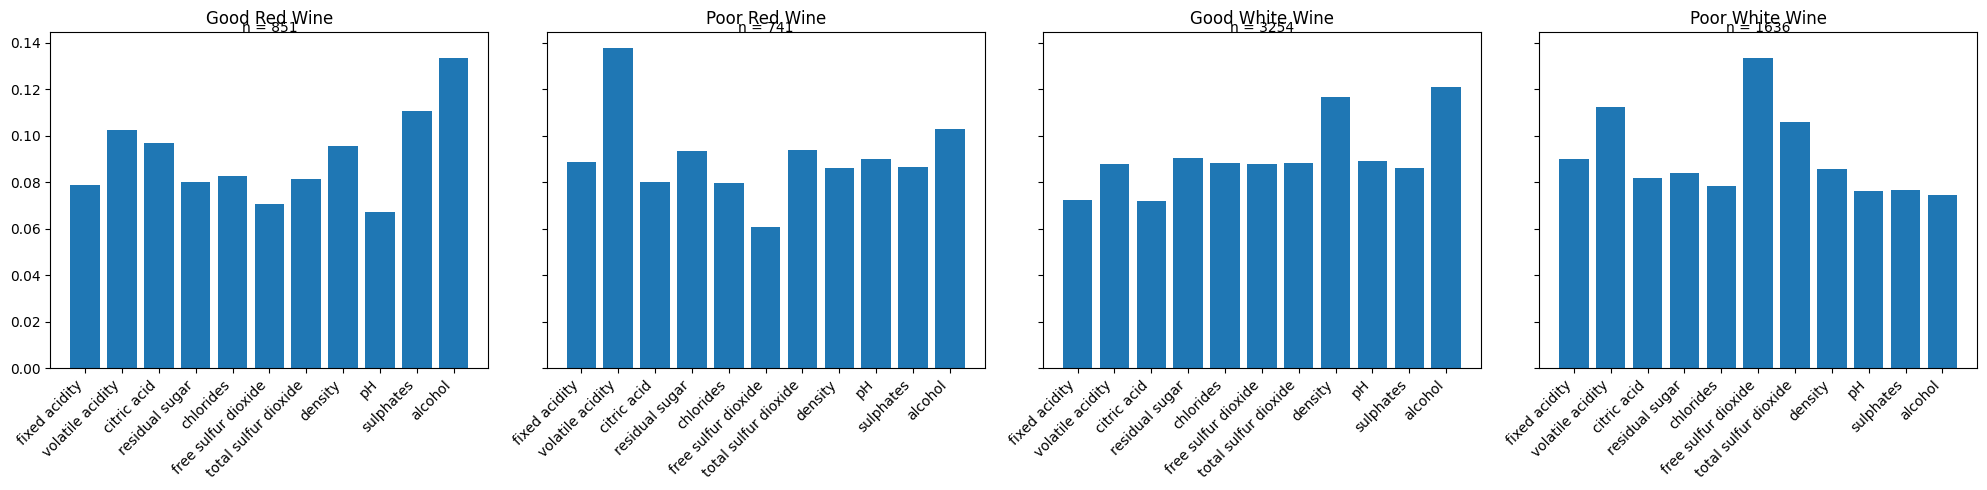

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Function to train Random Forest and get feature importances
def get_feature_importances(dataframe):
    # Check and select only numeric columns, excluding 'quality'
    numeric_columns = dataframe.select_dtypes(include=np.number).columns.tolist()
    if 'quality' in numeric_columns:
        numeric_columns.remove('quality')
    X = dataframe[numeric_columns]
    y = dataframe['quality']
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X, y)
    return rf.feature_importances_, numeric_columns

# Load your dataframes here
# df_red_good_without_outliers, df_red_poor_without_outliers, df_white_good_without_outliers, df_white_poor_without_outliers

# Get feature importances and numeric columns
good_red_importances, good_red_columns = get_feature_importances(df_red_good_without_outliers)
poor_red_importances, poor_red_columns = get_feature_importances(df_red_poor_without_outliers)
good_white_importances, good_white_columns = get_feature_importances(df_white_good_without_outliers)
poor_white_importances, poor_white_columns = get_feature_importances(df_white_poor_without_outliers)

# Plotting
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
axes[0].bar(good_red_columns, good_red_importances)
axes[1].bar(poor_red_columns, poor_red_importances)
axes[2].bar(good_white_columns, good_white_importances)
axes[3].bar(poor_white_columns, poor_white_importances)

# Add titles and sample sizes as annotations
for i, df, columns in zip(range(4), 
                          [df_red_good_without_outliers, df_red_poor_without_outliers, df_white_good_without_outliers, df_white_poor_without_outliers], 
                          [good_red_columns, poor_red_columns, good_white_columns, poor_white_columns]):
    axes[i].set_title(f"{'Good' if i%2 == 0 else 'Poor'} {'Red' if i < 2 else 'White'} Wine")
    axes[i].set_xticks(range(len(columns)))
    axes[i].set_xticklabels(columns, rotation=45, ha="right")
    axes[i].annotate(f"n = {len(df)}", xy=(0.5, 1), xycoords='axes fraction', ha='center')

plt.tight_layout()
plt.show()

## Significant Statement

## Conclusion & Discussions

## Additional - Gridsearch Model creation

Firstly, we decided to create the Grid seach with cross-validation to find the best model for each of our datasets, but after realising that SciKit Learn doesn't provide statistical analysis of the model we had to  recreate the Linear Model using scipy library.**

### 5.2.1 Function: evaluate_GS_model

**Parameters:**
*   `pipe` - the pipeline through which we pass
*   `X_train`, `y_train`, `X_test`, `y_test` - data
*   `classifier_params` - hyperparameters for the evaluated model
*   `pipeline_name`
*   `cv` - type of cross-validation (StratifiedKFold 5-fold)

We define a `GridSearchCV` refitting on `r2`.
- Fit the model.
- Predict test data.
- Extract the mean `r2` from cross-validation.
- Select the model with the best parameters.
- Save the results to a dataframe.
- Calculate the score matrix **(since SciKit Learn doesn't provide the statistical analysis of the model we tried to recreate it using stats library)**


In [180]:
def evaluate_GS_model(
    pipe,
    X_train, 
    y_train, 
    X_test, 
    y_test, 
    regression_params,
    pipeline_name,
    cv=KFold(n_splits=5),
    predict_test=True,
    predict_train=True,
):
    """
    Evaluate a machine learning model using grid search with cross-validation.

    Parameters:
    - pipe (sklearn.pipeline.Pipeline): The machine learning pipeline to evaluate.
    - X_train, y_train, X_test, y_test (pandas.DataFrame): Training and testing datasets.
    - regression_params (dict): Parameter grid for grid search.
    - pipeline_name (str): Name of the machine learning pipeline.
    - cv (sklearn.model_selection._split): Cross-validation strategy (default: KFold with 5 splits).
    - predict_test (bool): Whether to predict and evaluate on the test set.
    - predict_train (bool): Whether to predict and evaluate on the training set.

    Returns:
    - tuple: Results DataFrame and Evaluation Matrix DataFrame.
    """
    
    # define grid search
    grid_search_model = GridSearchCV(
        pipe,
        regression_params,
        cv=cv,
        scoring=["r2", "neg_mean_squared_error", "neg_median_absolute_error"],
        refit="neg_mean_squared_error",
        return_train_score=True,
        verbose=3,
    )

    # fit model
    grid_search_model.fit(X_train, y_train)
    y_test_pred = grid_search_model.predict(X_test) if predict_test else None
    test_score = metrics.mean_squared_error(y_test, y_test_pred) if predict_test else None

    y_train_pred = grid_search_model.predict(X_train) if predict_train else None
    train_score = metrics.mean_squared_error(y_train, y_train_pred) if predict_train else None 

    mean_cv_score = grid_search_model.best_score_

    cv_results_df = pd.DataFrame(grid_search_model.cv_results_).iloc[[grid_search_model.best_index_]]
    cv_splits_scores_df = cv_results_df.filter(regex=r"split\d*_test_mean_squared_error").reset_index(drop=True) 
    
    # getting scores based on the metrics defined in the score
    metrics_results_df = cv_results_df.filter(regex=r"mean_test_*").reset_index(drop=True)

    best_estimator = grid_search_model.best_estimator_.named_steps[pipe.steps[-1][0]]

    coefficients = best_estimator.coef_
    intercept = best_estimator.intercept_

    # save results in DataFrame
    this_result = pd.concat(
        [pd.DataFrame({
            "pipeline_name": [pipeline_name],
            "features": [list(X_test.columns)],
            'coef': [coefficients], 
            "train score": [train_score],
            "mean_cv_score": [mean_cv_score],
            "test_score": [test_score],
            "best_model": [grid_search_model.best_estimator_],
            "parameters": [grid_search_model.best_params_],
            }),
            cv_splits_scores_df,
            metrics_results_df,
        ],
        axis=1
    )

    # create DataFrame for the evaluation matrix
    parameters = np.append(intercept, coefficients)
    dataset_column_names = ['Intercept']
    dataset_column_names.extend(list(X_test.columns))
    
    evaluation_matrix_df = pd.DataFrame({
        'df': [pipeline_name for number in range(len(parameters))],
        'const': [pipeline_name for number in range(len(parameters))],
        "Parameters": pd.Series(dataset_column_names),
        "Coefficients": pd.Series(parameters),
    })
    
    return this_result, evaluation_matrix_df


### 5.2.2 Define Linear Models using pipelines

* For **y** we take the labels representing the quality of wine form 1 to 10 (1 the lowest score)
* For **X** we select the 8 psychomical features.
* The three pairs of the features that were highly correlated we chose the former, the later or the mean of both. 

In [181]:
#params for our gridsearch
base_steps = [('scaler', StandardScaler())] #normalizing values
lr = ("lr", LinearRegression())
lr_params = dict(lr__fit_intercept=[True, False])

estimators = [(lr, lr_params)]


In [189]:
def building_pipelines(df_lists, features=[top_features_dict, features_among_highly_associated_dict], test_size=0.2, random_state=42):
    """
    Create pipelines and evaluate models for each dataset and feature set.

    Parameters:
    - df_lists (list): List of datasets.
    - features (list): List of feature sets to use in the pipelines.
    - test_size (float): Size of the test set in the train-test split (default: 0.2).
    - random_state (int): Random seed for reproducibility (default: 42).

    Returns:
    - tuple: Pipeline, DataFrame with scores, and a list of evaluation matrices.
    """
    results_df = pd.DataFrame()
    evaluation_matrix_list = []

    # iterate through each dataset
    for dataset in df_lists:
        dataset_name = get_wine_str(dataset)
        
        # iterate through each feature list 
        for feature_set in features:
            # name the pipeline
            pipeline_name = f"Pipeline_{dataset_name}"

            # create X and y sets
            y = dataset['quality']
            X = dataset[feature_set[dataset_name]]

            # train-test split
            X_train, X_test, y_train, y_test = train_test_split(
                X, 
                y, 
                test_size=test_size, 
                random_state=random_state
            )

            # GridSearch 
            for (estimator, params) in estimators:
                print(f"Evaluating {estimator}\n")

                # create a pipeline from the base steps list and estimator
                pipe = Pipeline(base_steps + [estimator])

                this_results, evaluation_matrix = evaluate_GS_model(
                    pipe=pipe,
                    pipeline_name=pipeline_name,
                    X_train=X_train,
                    y_train=y_train,
                    X_test=X_test,
                    y_test=y_test,
                    regression_params=params,
                    predict_test=True,
                    predict_train=True,
                    cv=StratifiedKFold(n_splits=5)
                )
                results_df = pd.concat([results_df, this_results], ignore_index=True)

                evaluation_matrix_list.append([evaluation_matrix])

    return pipe, results_df, evaluation_matrix_list


### Testing pipeline on our datasets

In [190]:
pipe, results_df, evaluation_matrix_list = building_piplines(wine_quality_without_outliers_dfs)

Rating ('lr', LinearRegression()) 

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END lr__fit_intercept=True; neg_mean_squared_error: (train=-0.113, test=-0.116) neg_median_absolute_error: (train=-0.113, test=-0.117) r2: (train=0.079, test=0.089) total time=   0.0s
[CV 2/5] END lr__fit_intercept=True; neg_mean_squared_error: (train=-0.113, test=-0.118) neg_median_absolute_error: (train=-0.112, test=-0.110) r2: (train=0.082, test=0.073) total time=   0.0s
[CV 3/5] END lr__fit_intercept=True; neg_mean_squared_error: (train=-0.112, test=-0.121) neg_median_absolute_error: (train=-0.113, test=-0.102) r2: (train=0.082, test=0.068) total time=   0.0s
[CV 4/5] END lr__fit_intercept=True; neg_mean_squared_error: (train=-0.114, test=-0.115) neg_median_absolute_error: (train=-0.113, test=-0.128) r2: (train=0.093, test=0.017) total time=   0.0s
[CV 5/5] END lr__fit_intercept=True; neg_mean_squared_error: (train=-0.115, test=-0.108) neg_median_absolute_error: (train=-0.116, t

c:\Users\zosia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\zosia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


[CV 2/5] END lr__fit_intercept=False; neg_mean_squared_error: (train=-41.052, test=-41.174) neg_median_absolute_error: (train=-6.185, test=-6.183) r2: (train=-117.031, test=-115.931) total time=   0.0s
[CV 3/5] END lr__fit_intercept=False; neg_mean_squared_error: (train=-41.055, test=-41.141) neg_median_absolute_error: (train=-6.175, test=-6.189) r2: (train=-117.040, test=-115.838) total time=   0.0s
[CV 4/5] END lr__fit_intercept=False; neg_mean_squared_error: (train=-41.074, test=-41.249) neg_median_absolute_error: (train=-6.178, test=-6.190) r2: (train=-116.044, test=-120.454) total time=   0.0s
[CV 5/5] END lr__fit_intercept=False; neg_mean_squared_error: (train=-41.065, test=-40.775) neg_median_absolute_error: (train=-6.175, test=-6.164) r2: (train=-116.698, test=-116.245) total time=   0.0s
Rating ('lr', LinearRegression()) 

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END lr__fit_intercept=True; neg_mean_squared_error: (train=-0.108, test=-0.109) neg_med

### Results of the model:

In [191]:
results_df

pipeline_name  \
0  Pipeline_White Wine Poor (Without Outliers)   
1  Pipeline_White Wine Poor (Without Outliers)   
2  Pipeline_White Wine Good (Without Outliers)   
3  Pipeline_White Wine Good (Without Outliers)   
4    Pipeline_Red Wine Poor (Without Outliers)   
5    Pipeline_Red Wine Poor (Without Outliers)   
6    Pipeline_Red Wine Good (Without Outliers)   
7    Pipeline_Red Wine Good (Without Outliers)   

                                            features  \
0  [free sulfur dioxide, volatile acidity, total ...   
1  [free sulfur dioxide, volatile acidity, residu...   
2  [alcohol, density, chlorides, total sulfur dio...   
3  [alcohol, chlorides, total sulfur dioxide, res...   
4  [volatile acidity, total sulfur dioxide, pH, f...   
5  [volatile acidity, total sulfur dioxide, pH, c...   
6  [alcohol, volatile acidity, sulphates, citric ...   
7  [alcohol, volatile acidity, sulphates, citric ...   

                                                coef  train score  \
0  [0.009804424160145675, -0.059479220409756464, ...     0.113651   
1  [0.037149606235627075, -0.05443671297011143, 0...     0.115442   
2  [0.02335745624729898, -0.33332421629431724, -0...     0.308168   
3  [0.20322606485574743, -0.03970062880296661, 0....     0.308824   
4  [-0.0984315648917267, 0.06506705592099327, -0....     0.107697   
5  [-0.09738634750601528, 0.06258791750627782, -0...     0.107612   
6  [0.12993460890703012, -0.030543707212247334, 0...     0.201659   
7  [0.14322209473124037, -0.03049374464085257, 0....     0.200962   

   mean_cv_score  test_score                              best_model  \
0      -0.115599    0.136677  (StandardScaler(), LinearRegression())   
1      -0.117185    0.136345  (StandardScaler(), LinearRegression())   
2      -0.310040    0.326090  (StandardScaler(), LinearRegression())   
3      -0.310859    0.328447  (StandardScaler(), LinearRegression())   
4      -0.111995    0.083575  (StandardScaler(), LinearRegression())   
5      -0.113002    0.082503  (StandardScaler(), LinearRegression())   
6      -0.207719    0.147937  (StandardScaler(), LinearRegression())   
7      -0.206721    0.147073  (StandardScaler(), LinearRegression())   

                    parameters  mean_test_r2  \
0  {'lr__fit_intercept': True}      0.065193   
1  {'lr__fit_intercept': True}      0.051781   
2  {'lr__fit_intercept': True}      0.110858   
3  {'lr__fit_intercept': True}      0.108493   
4  {'lr__fit_intercept': True}      0.066067   
5  {'lr__fit_intercept': True}      0.057932   
6  {'lr__fit_intercept': True}      0.169862   
7  {'lr__fit_intercept': True}      0.173800   

   mean_test_neg_mean_squared_error  mean_test_neg_median_absolute_error  
0                         -0.115599                            -0.111200  
1                         -0.117185                            -0.118854  
2                         -0.310040                            -0.396855  
3                         -0.310859                            -0.401499  
4                         -0.111995                            -0.101692  
5                         -0.113002                            -0.102416  
6                         -0.207719                            -0.314700  
7                         -0.206721                            -0.311507

### Discussion:

For each of datasets we identify the most suitable dataset: 

**White Poor Wine (N=1639)** (1)
* r2 on the test = 0.136345
* Features: Volatile Acidity, Free Sulfur Dioxide, Residual Sugar, Alcohol, Total Sulfur Dioxide, Fixed Acidity, Density, Citric Acid.

**White Good Wine (N=3249)** (3)
* r2 on the test = 0.328447
* Features: Alcohol, Density, Chlorides, Total Sulfur Dioxide, Residual Sugar, pH, Fixed Acidity

**Red Poor Wine (N=741)** (4) 
* r2 on the test = 0.083575
* Features: Volatile Acidity, Total Sulfur Dioxide, pH, Citric Acid, Alcohol, Sulphates, Density, Residual Sugar.

**Red Good Wine (N=851)** (6)
* r2 on the test = 0.147937
* Features: Alcohol, volatile acidity, sulphates, chlorides, total sulfur dioxide, residual sugar, pH

**Comment**: Overall, we can say that the models don't predict quality very much, r2 suggest that they describe between 13% to 32% of variance.

### When it comes to Intercept and coeficients scores of the model there are presented below: 

e.g. Pipeline_White Wine Poor (Without Outliers)

In [188]:
evaluation_matrix_list[1][0]

df  \
0  Pipeline_White Wine Poor (Without Outliers)   
1  Pipeline_White Wine Poor (Without Outliers)   
2  Pipeline_White Wine Poor (Without Outliers)   
3  Pipeline_White Wine Poor (Without Outliers)   
4  Pipeline_White Wine Poor (Without Outliers)   
5  Pipeline_White Wine Poor (Without Outliers)   
6  Pipeline_White Wine Poor (Without Outliers)   
7  Pipeline_White Wine Poor (Without Outliers)   
8  Pipeline_White Wine Poor (Without Outliers)   

                                         const           Parameters  \
0  Pipeline_White Wine Poor (Without Outliers)            Intercept   
1  Pipeline_White Wine Poor (Without Outliers)  free sulfur dioxide   
2  Pipeline_White Wine Poor (Without Outliers)     volatile acidity   
3  Pipeline_White Wine Poor (Without Outliers)       residual sugar   
4  Pipeline_White Wine Poor (Without Outliers)              alcohol   
5  Pipeline_White Wine Poor (Without Outliers)        fixed acidity   
6  Pipeline_White Wine Poor (Without Outliers)          citric acid   
7  Pipeline_White Wine Poor (Without Outliers)            chlorides   
8  Pipeline_White Wine Poor (Without Outliers)            sulphates   

   Coefficients  
0      4.882263  
1      0.037150  
2     -0.054437  
3      0.022813  
4     -0.017102  
5     -0.024791  
6      0.016143  
7     -0.007053  
8      0.003767

**Comment:** based on the coeddicient we can say that the most importnat feature for White poor wine quality prediction is volatile acidity (|score| = 0.05). However, because the model doesn't provide statistical calcualtion od t value and p-value, we don't know if the score is significant.